In [ ]:
############################################################################################################################
#### We are currently working on a dataset from the 2012 Election, motivated solely by our passion for statistics and ######
#### data analysis. We want to make it clear that our approach is unbiased, and we are not making any assumptions or #######
#### expressing support for any party involved. Our goal is to explore the data objectively, and we do not wish for any ####
#### assumptions or judgments to be drawn from this dataset. ###############################################################
############################################################################################################################


In [593]:
#########################################################################################################
######################### ELECTION 2012 DATA SET  #######################################################
#########################################################################################################


In [594]:
#################################################################
############ Part I - Importing
#################################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [595]:
#### getting the data

df = pd.read_csv('2012-general-election-romney-vs-obama.csv')

In [596]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,NaN,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,NaN,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,NaN,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,NaN,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,NaN,1


In [597]:
#####################################################################
########################### Part II - Duplicates
#####################################################################


In [598]:
df[df.duplicated()]                         #### no duplicates

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Text,Question Iteration


In [599]:
####################################################################
############## Part III - Missing Values
####################################################################


In [600]:
from matplotlib.colors import LinearSegmentedColormap

Amelia = LinearSegmentedColormap.from_list('black_yellow', ['black', 'yellow'])


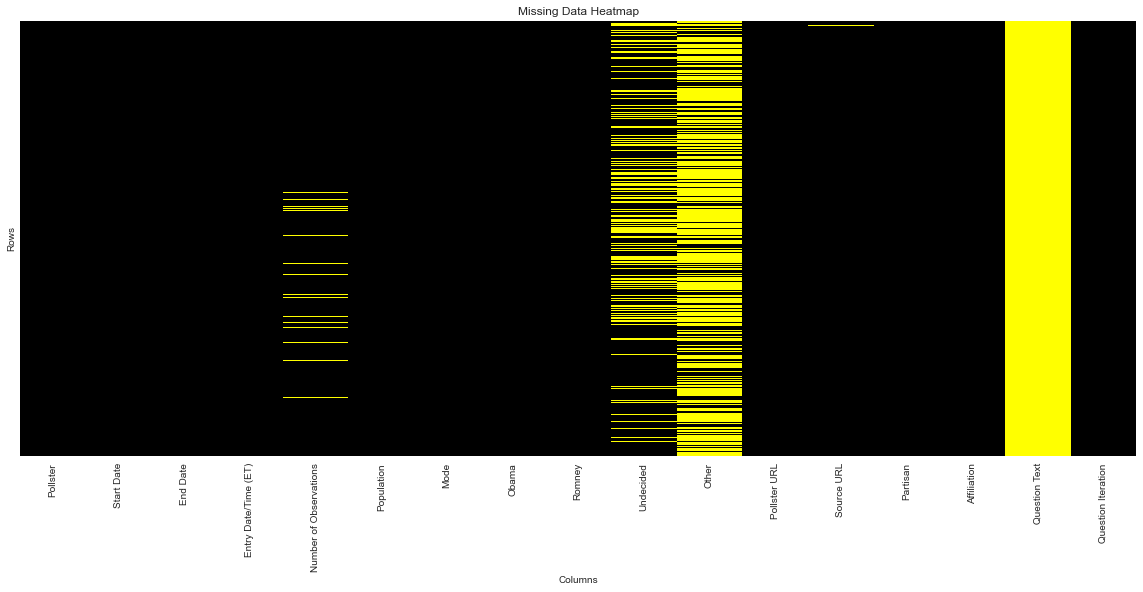

In [601]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### why Amelia, if you coming from R then you might have used Amelia package which detects the missing value 
#### On July 2, 1937, Amelia disappeared over the Pacific Ocean while attempting to become the first female pilot to circumnavigate the world

In [602]:
df.isnull().any()

Pollster                  False
Start Date                False
End Date                  False
Entry Date/Time (ET)      False
Number of Observations     True
Population                False
Mode                      False
Obama                     False
Romney                    False
Undecided                  True
Other                      True
Pollster URL              False
Source URL                 True
Partisan                  False
Affiliation               False
Question Text              True
Question Iteration        False
dtype: bool

In [603]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 590 entries, 0 to 589
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Pollster                590 non-null    object 
 1   Start Date              590 non-null    object 
 2   End Date                590 non-null    object 
 3   Entry Date/Time (ET)    590 non-null    object 
 4   Number of Observations  568 non-null    float64
 5   Population              590 non-null    object 
 6   Mode                    590 non-null    object 
 7   Obama                   590 non-null    float64
 8   Romney                  590 non-null    float64
 9   Undecided               423 non-null    float64
 10  Other                   202 non-null    float64
 11  Pollster URL            590 non-null    object 
 12  Source URL              588 non-null    object 
 13  Partisan                590 non-null    object 
 14  Affiliation             590 non-null    ob

In [604]:
df.drop(columns='Question Text',inplace=True)

#### its best to drop Question text

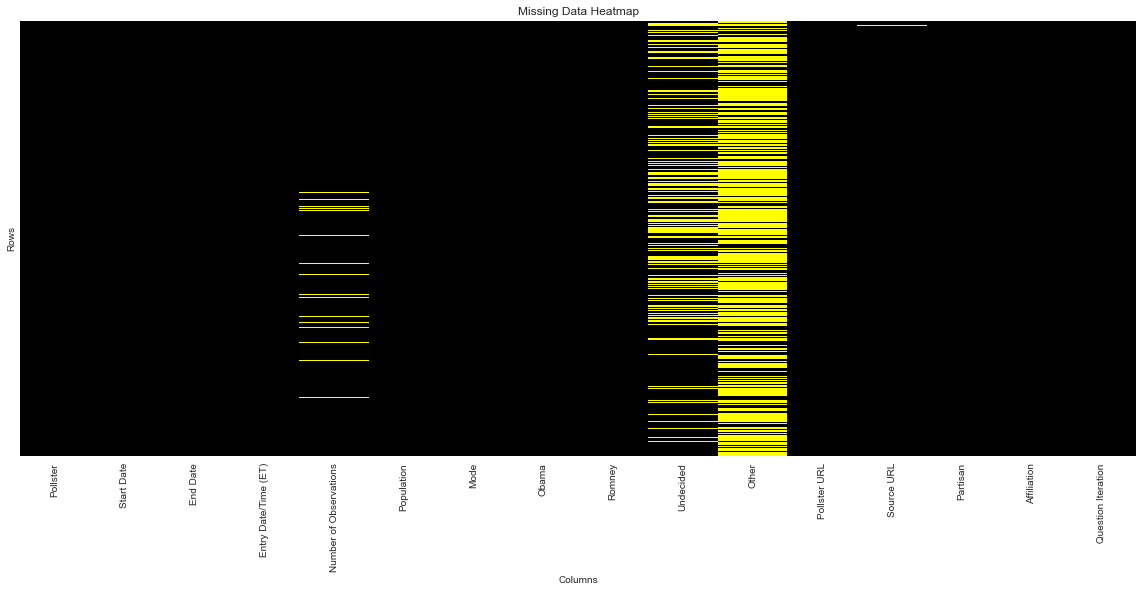

In [605]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


#### off to the next ones

In [606]:
df[df['Source URL'].isna()]

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
6,UPI/CVOTER,2012-11-03,2012-11-05,2012-11-05T18:30:15Z,3000.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,1
20,UPI/CVOTER,2012-11-02,2012-11-02,2012-11-03T16:40:44Z,1074.0,Likely Voters,Live Phone,49.0,48.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,NaN,Nonpartisan,None,1


In [607]:
df.dropna(subset=['Source URL'],inplace=True)

In [608]:
df[df['Source URL'].isna()]                    #### took care of null values in source url col

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration


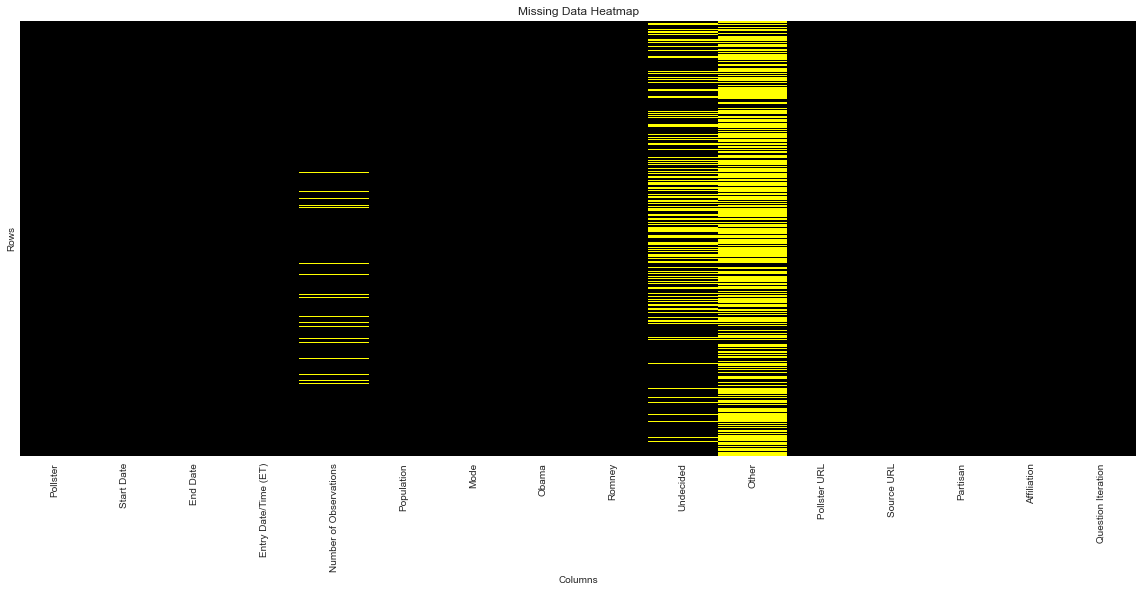

In [609]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


#### 3 to go

In [610]:
df.head()

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1


In [611]:
df[df['Number of Observations'].isna()]               #### because this is numerical col instead of dropping we will just fill it up with the mean

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
206,Post/Kaiser,2012-07-25,2012-08-05,2012-08-21T11:29:56Z,NaN,Registered Voters,Live Phone,50.0,43.0,5.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://www.washingtonpost.com/wp-srv/politics/...,Nonpartisan,None,1
232,YouGov/Economist,2012-07-07,2012-07-09,2012-07-11T13:07:24Z,NaN,Registered Voters,Internet,43.0,44.0,8.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
242,YouGov/Economist,2012-06-30,2012-07-02,2012-07-05T09:04:12Z,NaN,Registered Voters,Internet,47.0,43.0,8.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
251,YouGov/Economist,2012-06-23,2012-06-25,2012-06-27T13:12:20Z,NaN,Registered Voters,Internet,45.0,44.0,7.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
254,NBC/WSJ,2012-06-20,2012-06-24,2012-06-26T14:01:33Z,NaN,Registered Voters,Live Phone,47.0,44.0,6.0,3.0,http://elections.huffingtonpost.com/pollster/p...,http://msnbcmedia.msn.com/i/MSNBC/Sections/A_P...,Nonpartisan,None,1
257,YouGov/Economist,2012-06-16,2012-06-18,2012-06-20T13:10:25Z,NaN,Registered Voters,Internet,44.0,44.0,7.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1
291,NBC/WSJ,2012-05-16,2012-05-20,2012-05-23T08:32:09Z,NaN,Registered Voters,Live Phone,47.0,43.0,5.0,6.0,http://elections.huffingtonpost.com/pollster/p...,http://msnbcmedia.msn.com/i/MSNBC/Sections/A_P...,Nonpartisan,None,1
329,NBC/WSJ,2012-04-13,2012-04-17,2012-04-20T08:58:13Z,NaN,Registered Voters,Live Phone,49.0,43.0,3.0,4.0,http://elections.huffingtonpost.com/pollster/p...,http://msnbcmedia.msn.com/i/MSNBC/Sections/A_P...,Nonpartisan,None,1
344,ABC/Post,2012-04-05,2012-04-08,2012-04-10T11:01:56Z,NaN,Registered Voters,Live Phone,51.0,43.0,4.0,2.0,http://elections.huffingtonpost.com/pollster/p...,http://www.washingtonpost.com/wp-srv/politics/...,Nonpartisan,None,1
371,ABC/Post,2012-03-07,2012-03-10,2012-03-12T12:12:26Z,NaN,Registered Voters,Live Phone,47.0,49.0,4.0,1.0,http://elections.huffingtonpost.com/pollster/p...,http://www.washingtonpost.com/wp-srv/politics/...,Nonpartisan,None,1


In [612]:
df['Number of Observations'].fillna(df['Number of Observations'].mean(),inplace=True)

In [613]:
df[df['Number of Observations'].isna()]          #### took care of it

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration


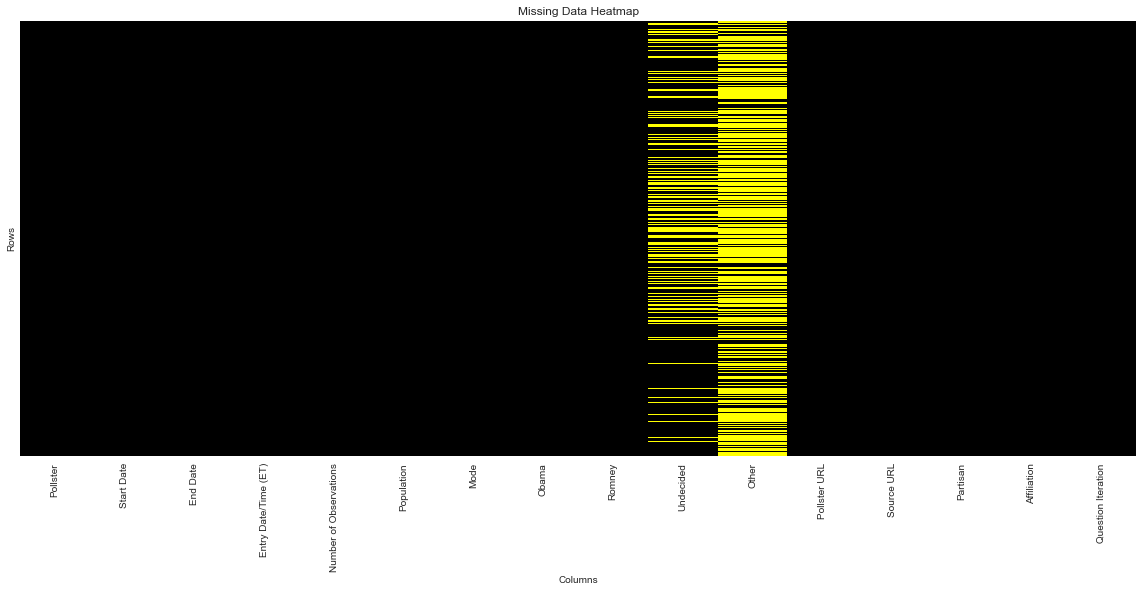

In [614]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### 2 to go

In [615]:
df[df.Undecided.isna()]

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1
12,Gallup,2012-11-01,2012-11-04,2012-11-05T13:48:29Z,2551.0,Likely Voters,Live Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gallup.com/poll/157817/election-201...,Nonpartisan,None,1
15,Democracy Corps (D),2012-11-01,2012-11-04,2012-11-05T09:41:50Z,1080.0,Likely Voters,Live Phone,49.0,45.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://big.assets.huffingtonpost.com/demcorpst...,Pollster,Dem,1
16,Angus-Reid,2012-11-01,2012-11-03,2012-11-06T08:47:46Z,1019.0,Likely Voters,Internet,51.0,48.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://www.angus-reid.com/polls/47681/obama-ho...,Nonpartisan,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
543,Rasmussen,2011-03-06,2011-03-09,2011-04-12T17:34:26Z,2000.0,Likely Voters,Automated Phone,45.0,40.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1
545,Newsweek/Daily Beast,2011-02-12,2011-02-15,2011-02-22T17:53:22Z,918.0,Likely Voters,Live Phone,49.0,47.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.thedailybeast.com/blogs-and-stories...,Pollster,Dem,1
552,Rasmussen,2011-01-03,2011-01-04,2011-02-07T17:23:37Z,2000.0,Likely Voters,Automated Phone,42.0,44.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1
565,Zogby (Internet),2010-07-16,2010-07-19,2010-11-08T11:54:08Z,8487.0,Likely Voters,Internet,45.0,43.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://politics.usnews.com/news/blogs/washingt...,Nonpartisan,None,1


In [616]:
df['Others'] = (100 - (df.Obama + df.Romney))

In [617]:
df.head()              #### we created a new column to sum of two columns which are Undecided and other so now we dont need them

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Undecided,Other,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration,Others
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1,6.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,3.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1,4.0
2,Gravis Marketing,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.gravispolls.com/2012/11/gravis-mark...,Nonpartisan,None,1,4.0
3,IBD/TIPP,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,NaN,1.0,http://elections.huffingtonpost.com/pollster/p...,http://news.investors.com/special-report/50841...,Nonpartisan,None,1,1.0
4,Rasmussen,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,NaN,NaN,http://elections.huffingtonpost.com/pollster/p...,http://www.rasmussenreports.com/public_content...,Nonpartisan,None,1,3.0


In [618]:
df.drop(columns=['Undecided','Other'],inplace=True)

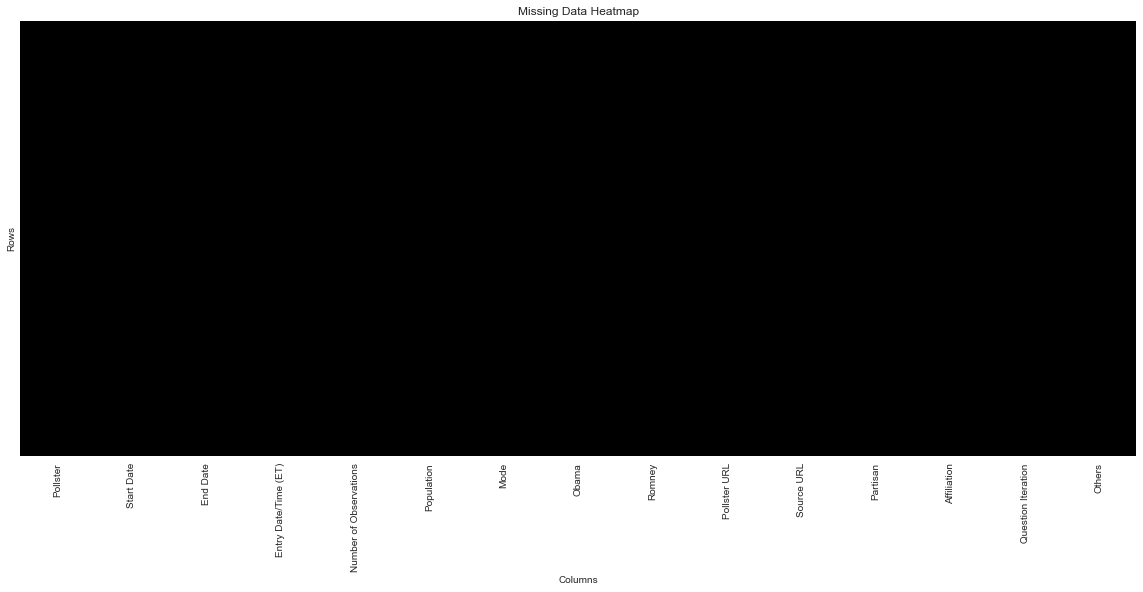

In [620]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

#### now our data is very clean

In [621]:
####################################################################
############## Part IV - Feature Engineering
####################################################################


In [622]:
df.head(2)            #### for now we will drop the URL cols

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Pollster URL,Source URL,Partisan,Affiliation,Question Iteration,Others
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,http://elections.huffingtonpost.com/pollster/p...,http://www.politico.com/news/stories/1112/8338...,Nonpartisan,None,1,6.0
1,YouGov/Economist,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,http://elections.huffingtonpost.com/pollster/p...,http://cdn.yougov.com/cumulus_uploads/document...,Nonpartisan,None,1,4.0


In [623]:
df.drop(columns=['Pollster URL','Source URL'],inplace=True)

In [624]:
df.head(1)

,Pollster,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Partisan,Affiliation,Question Iteration,Others
0,Politico/GWU/Battleground,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,Nonpartisan,None,1,6.0


In [625]:
df = df.reindex(columns=['Start Date','End Date','Entry Date/Time (ET)','Number of Observations','Population','Mode','Obama','Romney','Others','Partisan','Affiliation','Question Iteration','Pollster'])

In [626]:
df.head()                   #### this is much better to understand now

,Start Date,End Date,Entry Date/Time (ET),Number of Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Question Iteration,Pollster
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground
1,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov/Economist
2,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,Nonpartisan,None,1,Gravis Marketing
3,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,1.0,Nonpartisan,None,1,IBD/TIPP
4,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,3.0,Nonpartisan,None,1,Rasmussen


In [627]:
df.rename(columns={'Start Date':'Start_date',
                   'End Date':'End_date',
                   'Entry Date/Time (ET)':'Entry_date',
                   'Number of Observations':'Observations',
                   'Question Iteration':'Questions'},inplace=True)

In [628]:
df.head(1)

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground


In [629]:
######################################################################
############## Part V - EDA
######################################################################


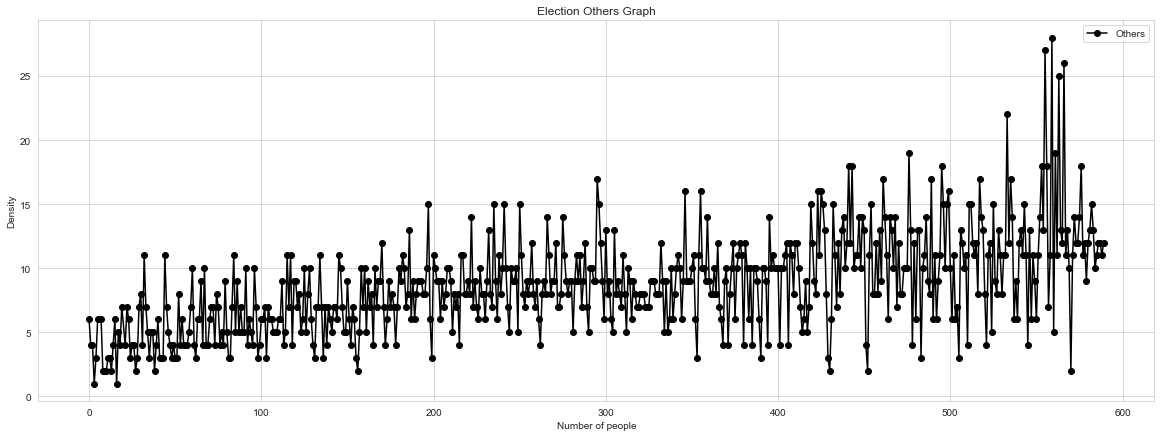

In [630]:
df['Others'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='black')

plt.title('Election Others Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')


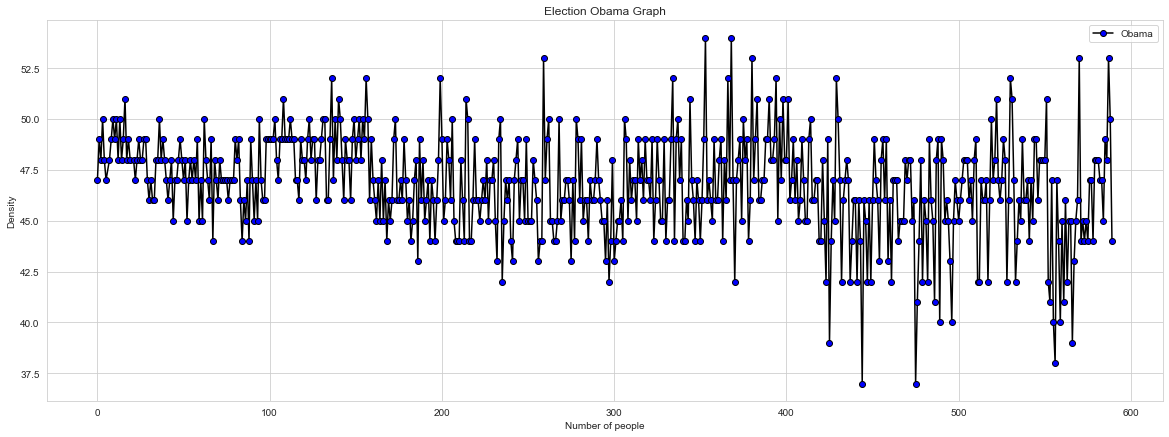

In [631]:
df['Obama'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='blue',color='black')

plt.title('Election Obama Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')



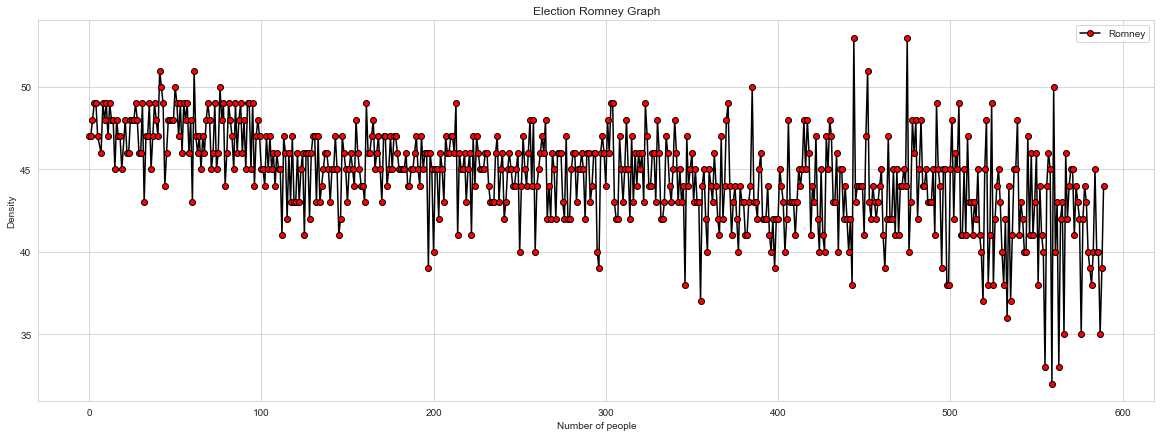

In [632]:
df['Romney'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

plt.title('Election Romney Graph')

plt.xlabel('Number of people')

plt.ylabel('Density')



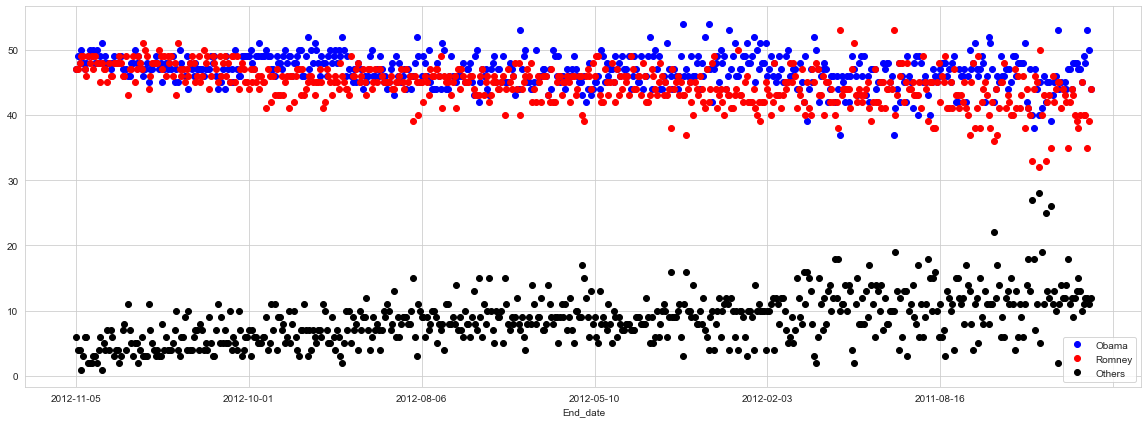

In [633]:
df.plot(x='End_date',y=['Obama','Romney','Others'],linestyle='',marker='o',figsize=(20,7),color={'Obama':'blue',
                                                                                                 'Romney':'red',
                                                                                                 'Others':'black'})
#### seems a very close call but Obama is slighyly winning here

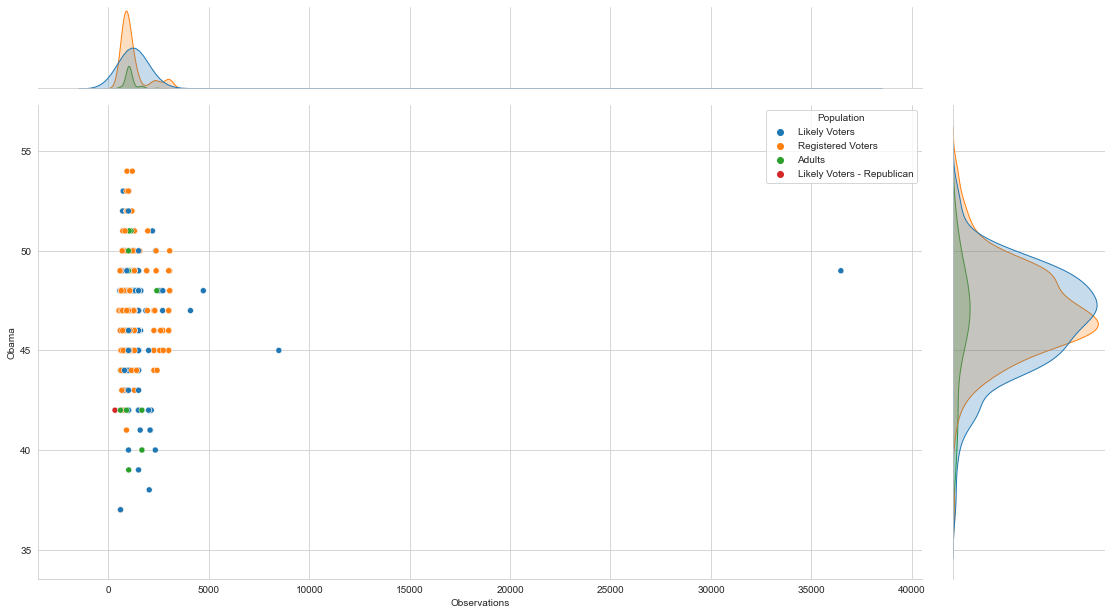

In [634]:
g = sns.jointplot(x=df.Observations,y=df['Obama'],data=df,hue='Population')

g.fig.set_size_inches(17,9)



In [635]:
df.Population.unique()

array(['Likely Voters', 'Registered Voters', 'Adults',
       'Likely Voters - Republican'], dtype=object)

In [636]:
df[df.Observations > 5000]                 #### these two are putting out data off, in short outliers

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster
18,2012-10-31,2012-11-03,2012-11-04T16:24:50Z,36472.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov
565,2010-07-16,2010-07-19,2010-11-08T11:54:08Z,8487.0,Likely Voters,Internet,45.0,43.0,12.0,Nonpartisan,None,1,Zogby (Internet)


In [637]:
df = df[df.Observations < 5000]

In [638]:
df.head()

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground
1,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov/Economist
2,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,Nonpartisan,None,1,Gravis Marketing
3,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,1.0,Nonpartisan,None,1,IBD/TIPP
4,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,3.0,Nonpartisan,None,1,Rasmussen


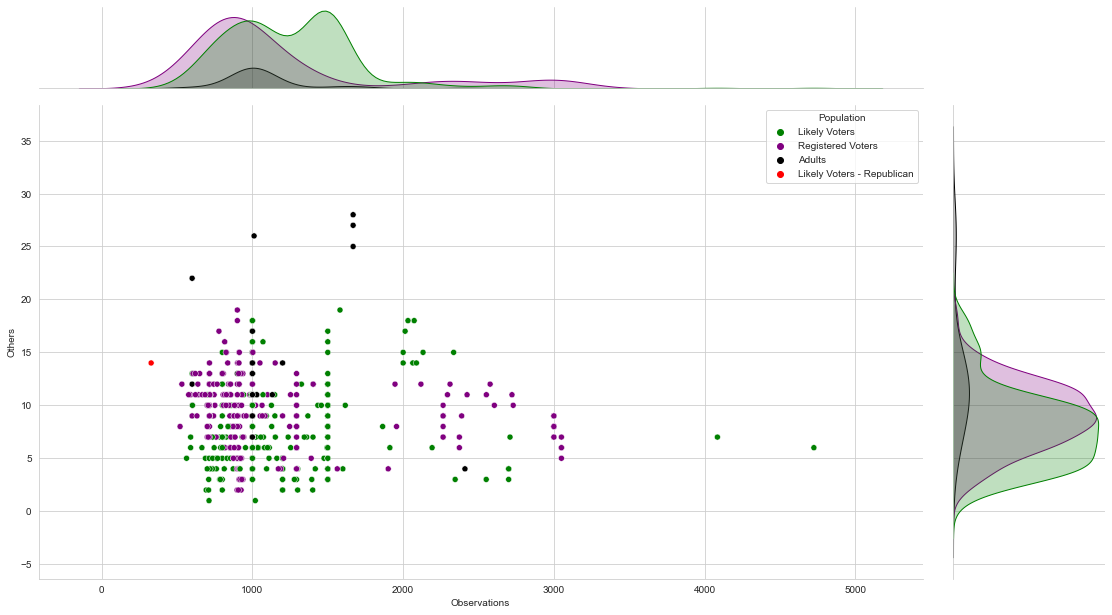

In [639]:
custom = {'Likely Voters':'green',
          'Registered Voters':'purple',
          'Adults':'black',
          'Likely Voters - Republican':'red'}

g = sns.jointplot(x=df.Observations,y=df['Others'],data=df,hue='Population',palette=custom)

g.fig.set_size_inches(17,9)

#### we can clearly see that majority of population is registered voters and likely voters in Others col

In [640]:
df.head()

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground
1,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov/Economist
2,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,Nonpartisan,None,1,Gravis Marketing
3,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,1.0,Nonpartisan,None,1,IBD/TIPP
4,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,3.0,Nonpartisan,None,1,Rasmussen


In [641]:
df['Winner'] = df.apply(lambda row: 'Obama' if row['Obama'] > row['Romney'] else ('Romney' if row['Obama'] < row['Romney'] else 'Tie'), axis=1)

#### I honestly prefer lambda and apply, you can use the fucntion and call it later but I prefer lambda

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [642]:
df.head()

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster,Winner
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground,Tie
1,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov/Economist,Obama
2,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,Nonpartisan,None,1,Gravis Marketing,Tie
3,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,1.0,Nonpartisan,None,1,IBD/TIPP,Obama
4,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,3.0,Nonpartisan,None,1,Rasmussen,Romney


In [643]:
df.Winner.unique()

array(['Tie', 'Obama', 'Romney'], dtype=object)

In [644]:
df.Winner.value_counts()                   #### clearly Obama has the lead here

Obama     386
Romney    133
Tie        67
Name: Winner, dtype: int64

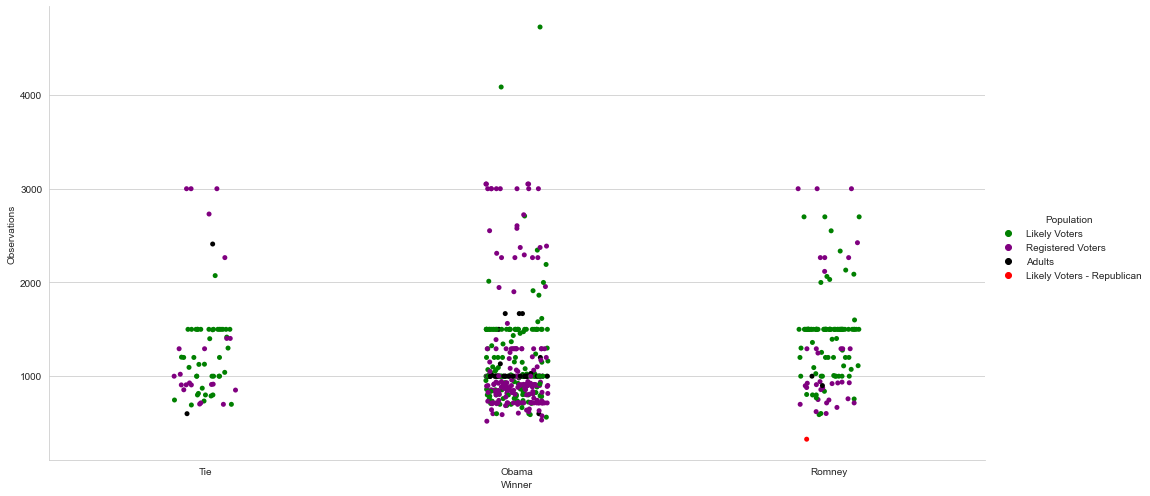

In [645]:
custom = {'Likely Voters':'green',
          'Registered Voters':'purple',
          'Adults':'black',
          'Likely Voters - Republican':'red'}

sns.catplot(x='Winner',y='Observations',data=df,kind='strip',height=7,aspect=2,legend=True,hue='Population',jitter=True,palette=custom)

#### clearly registered voters are dominating in the winner circle

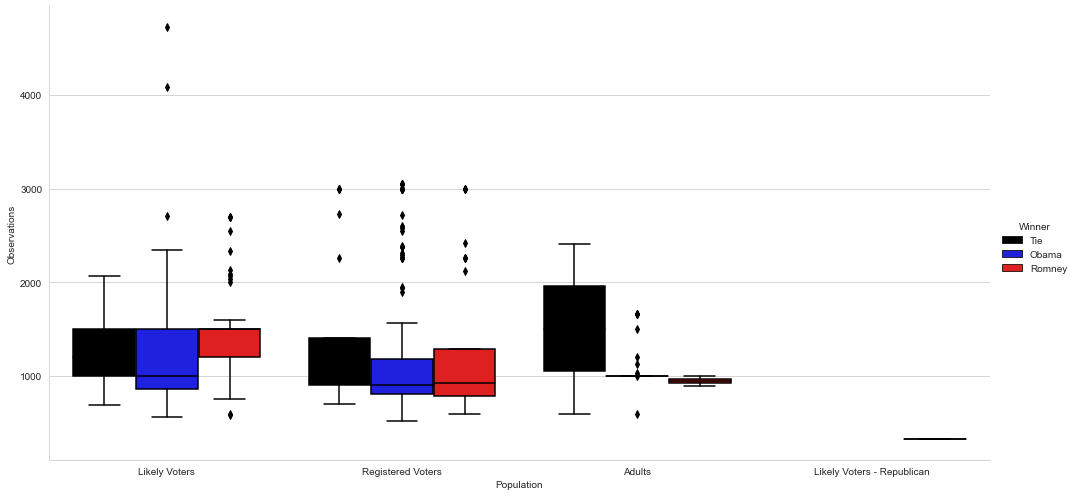

In [646]:
custom ={'Obama':'blue',
         'Romney':'red',
         'Tie':'black'}

sns.catplot(x='Population',y='Observations',data=df,kind='box',height=7,aspect=2,legend=True,hue='Winner',palette=custom)

#### this is interesting, likely voters shows support for Obama while Registered voters mean is same for both majority parties but it leans more towards Romney

In [647]:
df['Winner_Num'] = df.Winner.map({'Obama':0,
                                  'Romney':1,
                                  'Tie':2})

#### this will help us to further plot and make sense of it

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [648]:
df.head()

,Start_date,End_date,Entry_date,Observations,Population,Mode,Obama,Romney,Others,Partisan,Affiliation,Questions,Pollster,Winner,Winner_Num
0,2012-11-04,2012-11-05,2012-11-06T08:40:26Z,1000.0,Likely Voters,Live Phone,47.0,47.0,6.0,Nonpartisan,None,1,Politico/GWU/Battleground,Tie,2
1,2012-11-03,2012-11-05,2012-11-26T15:31:23Z,740.0,Likely Voters,Internet,49.0,47.0,4.0,Nonpartisan,None,1,YouGov/Economist,Obama,0
2,2012-11-03,2012-11-05,2012-11-06T09:22:02Z,872.0,Likely Voters,Automated Phone,48.0,48.0,4.0,Nonpartisan,None,1,Gravis Marketing,Tie,2
3,2012-11-03,2012-11-05,2012-11-06T08:51:48Z,712.0,Likely Voters,Live Phone,50.0,49.0,1.0,Nonpartisan,None,1,IBD/TIPP,Obama,0
4,2012-11-03,2012-11-05,2012-11-06T08:47:50Z,1500.0,Likely Voters,Automated Phone,48.0,49.0,3.0,Nonpartisan,None,1,Rasmussen,Romney,1


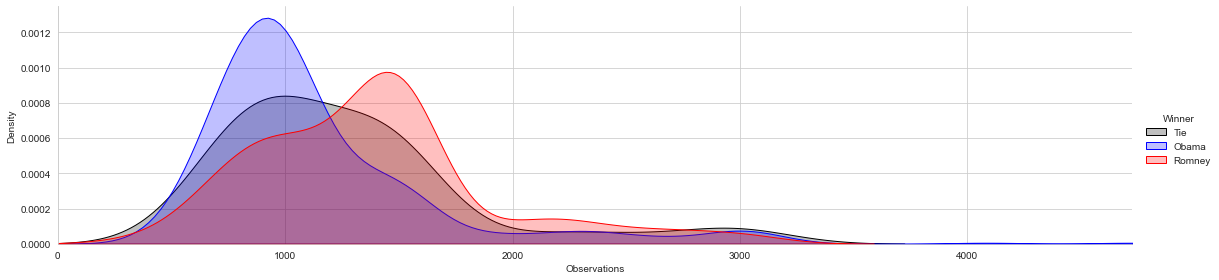

In [649]:
pl = sns.FacetGrid(df,hue='Winner',aspect=4,height=4,palette=custom)

pl.map(sns.kdeplot,'Observations',fill=True)

pl.set(xlim=(0,df.Observations.max()))

pl.add_legend()

#### seems like Obama peaks at observations 1000 and starts to decline in larger observations compared to Romney

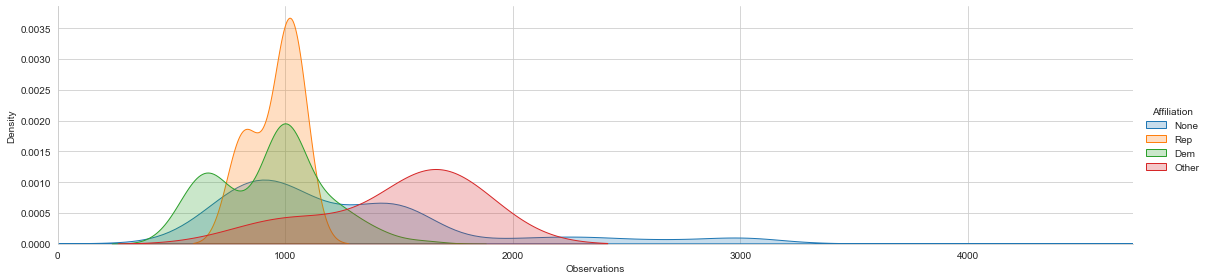

In [650]:
pl = sns.FacetGrid(df,hue='Affiliation',aspect=4,height=4)

pl.map(sns.kdeplot,'Observations',fill=True)

pl.set(xlim=(0,df.Observations.max()))

pl.add_legend()

#### note in the observations around 1000, Rep were highly affiliated then if you move forward with Observations we see a steep decline in Rep affiliation while Dem affiliation remains stable

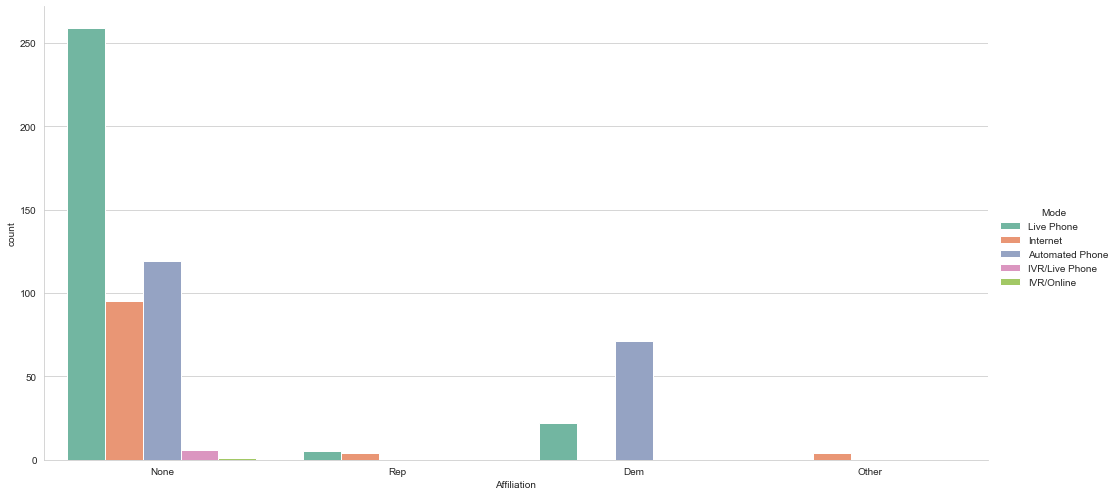

In [651]:
sns.catplot(x='Affiliation',data=df,kind='count',hue='Mode',height=7,aspect=2,palette='Set2')

#### seems like we had the most Affiliation with Dem via Live phone and Automated phone calls

In [652]:
df.Affiliation.value_counts()

None     480
Dem       93
Rep        9
Other      4
Name: Affiliation, dtype: int64

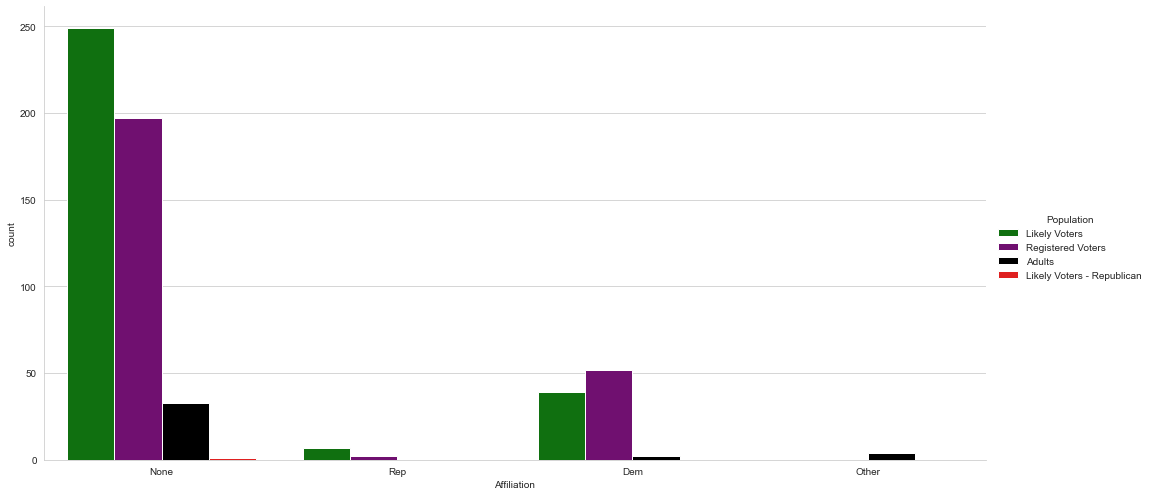

In [653]:
custom = {'Likely Voters':'green',
          'Registered Voters':'purple',
          'Adults':'black',
          'Likely Voters - Republican':'red'}


sns.catplot(x='Affiliation',data=df,kind='count',hue='Population',height=7,aspect=2,palette=custom)

plt.savefig('Election_affiliation_population_catplot.jpeg', dpi=300, bbox_inches='tight')

#### interesting

In [654]:
avg = df[['Obama','Romney','Others']].mean()

avg = pd.DataFrame(avg)

In [655]:
avg.head()

,0
Obama,46.766212
Romney,44.559727
Others,8.674061


In [656]:
std = pd.DataFrame(df[['Obama','Romney','Others']].std())

In [657]:
std.head()

,0
Obama,2.449131
Romney,2.925984
Others,3.834336


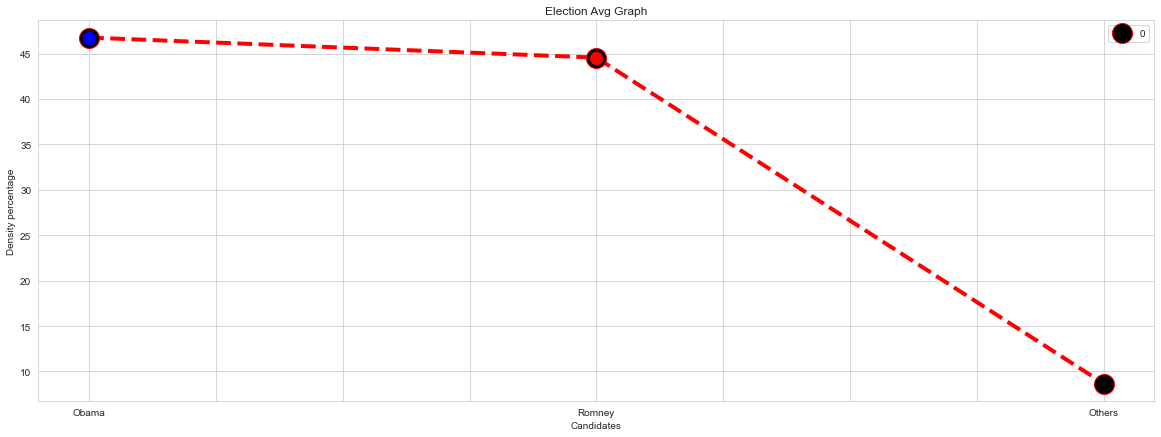

In [658]:

avg.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='red',linestyle='dashed',linewidth=4,markersize=20)

plt.scatter(avg.index[0], avg.iloc[0], color='blue', s=150, zorder=5)

plt.scatter(avg.index[1], avg.iloc[1], color='red', s=150, zorder=5)

plt.scatter(avg.index[2], avg.iloc[2], color='black', s=150, zorder=5)

plt.title('Election Avg Graph')

plt.xlabel('Candidates')

plt.ylabel('Density percentage')

#### from the avg it seems the race is very tight

In [659]:

new_df = pd.concat([avg,std],axis=1)

#### we will make a new dataframe to combine avg and std together

In [660]:
new_df.columns = ['Average','STD']

In [661]:
new_df                   #### this dataframe will come very handy

,Average,STD
Obama,46.766212,2.449131
Romney,44.559727,2.925984
Others,8.674061,3.834336


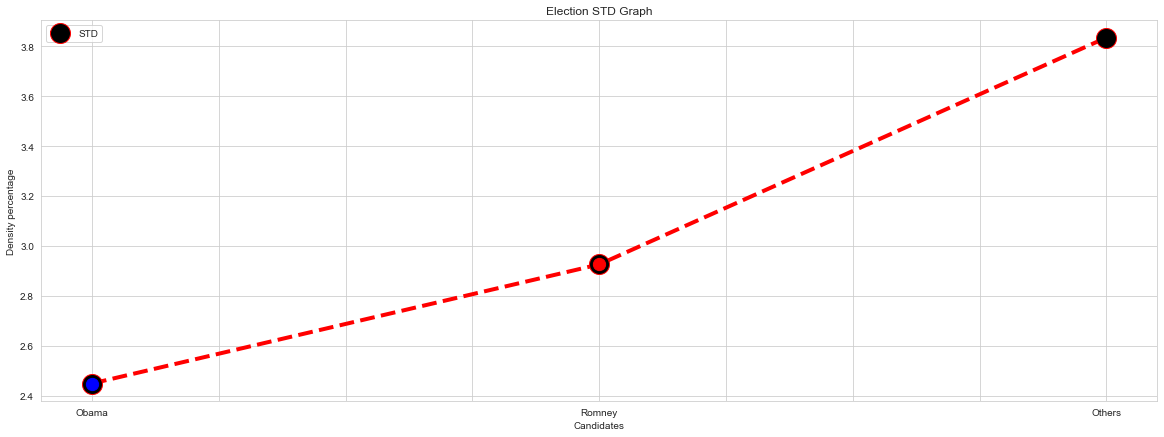

In [662]:
new_df['STD'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',color='red',linestyle='dashed',linewidth=4,markersize=20)

plt.scatter(new_df['STD'].index[0], new_df['STD'].iloc[0], color='blue', s=150, zorder=5)

plt.scatter(new_df['STD'].index[1], new_df['STD'].iloc[1], color='red', s=150, zorder=5)

plt.scatter(new_df['STD'].index[2], new_df['STD'].iloc[2], color='black', s=150, zorder=5)

plt.title('Election STD Graph')

plt.xlabel('Candidates')

plt.ylabel('Density percentage')


In [663]:
df['Difference'] = (df.Obama - df.Romney)/100             #### we are making this column to better understand the dip of both candidates on a plot

C:\Users\USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


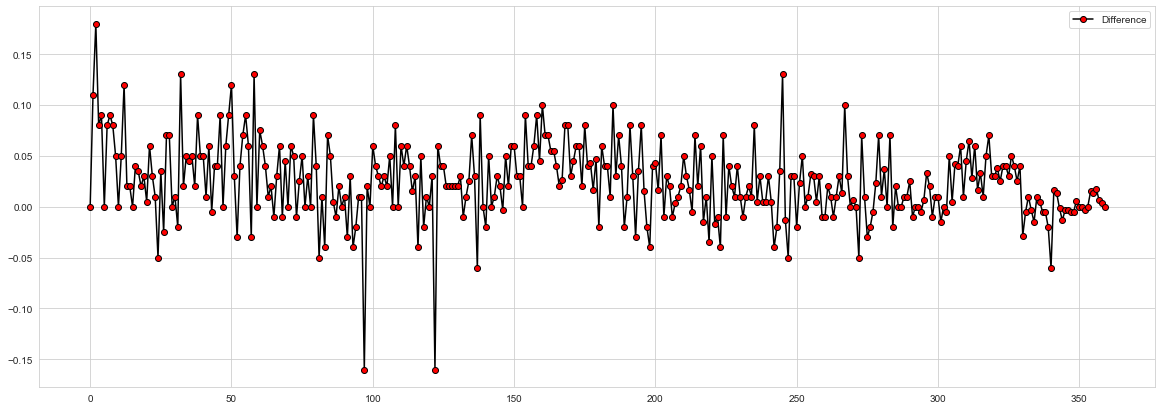

In [664]:
df.groupby(['Start_date'],as_index=False).mean()[['Start_date','Difference']].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black')

#### we clearly see some dip on Romney side, note y axis 0 means a tie and + means Obama and - means Romney

In [665]:
poll_df = df.groupby(['Start_date'],as_index=False).mean()

In [666]:
poll_df.drop(columns=['Questions'],inplace=True)

In [667]:
poll_df.head()

,Start_date,Observations,Obama,Romney,Others,Winner_Num,Difference
0,2009-03-13,1403.0,44.0,44.0,12.0,2.0,0.00
1,2009-04-17,686.0,50.0,39.0,11.0,0.0,0.11
2,2009-05-14,1000.0,53.0,35.0,12.0,0.0,0.18
3,2009-06-12,638.0,48.0,40.0,12.0,0.0,0.08
4,2009-07-15,577.0,49.0,40.0,11.0,0.0,0.09


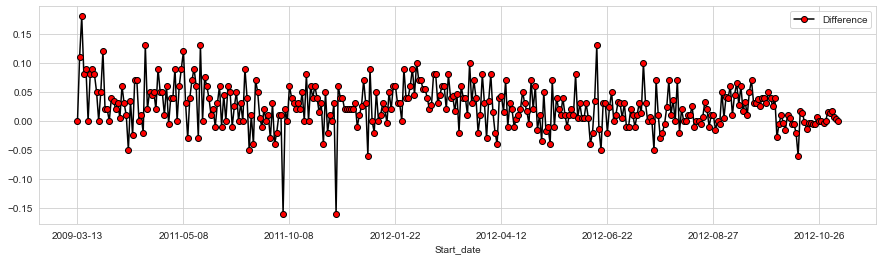

In [668]:
poll_df.plot('Start_date','Difference',linestyle='-',marker='o',figsize=(15,4),color='black',markerfacecolor='red')

#### here we clearly see the dip and also see the date at which it occured

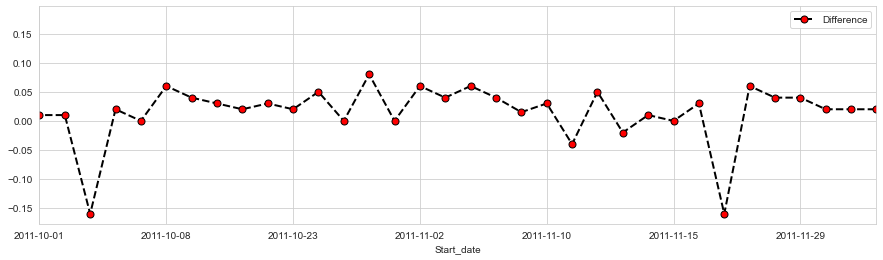

In [669]:
#### we see a major dip between 10-2011 and 1-12, lets investigate why is that case because it shows major support for Romney in those polls

poll_df.plot('Start_date','Difference',linestyle='dashed',marker='o',figsize=(15,4),xlim=(95,128),color='black',markerfacecolor='red',markersize=7,linewidth=2)


In [670]:
poll_df[poll_df['Difference'] < -0.10]

,Start_date,Observations,Obama,Romney,Others,Winner_Num,Difference
97,2011-10-05,602.0,37.0,53.0,10.0,1.0,-0.16
122,2011-11-20,602.0,37.0,53.0,10.0,1.0,-0.16


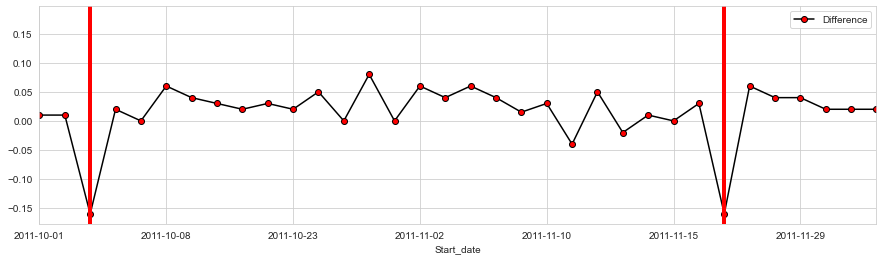

In [671]:
poll_df.plot('Start_date','Difference',linestyle='-',marker='o',figsize=(15,4),xlim=(95,128),color='black',markerfacecolor='red')

plt.axvline(x=95+2,linewidth=4,color='red')

plt.axvline(x=128-6,linewidth=4,color='red')

#### it seems like those are the dates where there a debate hence we see a major support for Romney after that

In [672]:
poll_df = df.groupby(['End_date'],as_index=False).mean()

In [673]:
poll_df.head()

,End_date,Observations,Obama,Romney,Others,Questions,Winner_Num,Difference
0,2009-03-15,1403.0,44.0,44.0,12.0,1.0,2.0,0.00
1,2009-04-19,686.0,50.0,39.0,11.0,1.0,0.0,0.11
2,2009-05-18,1000.0,53.0,35.0,12.0,1.0,0.0,0.18
3,2009-06-16,638.0,48.0,40.0,12.0,1.0,0.0,0.08
4,2009-07-16,577.0,49.0,40.0,11.0,1.0,0.0,0.09


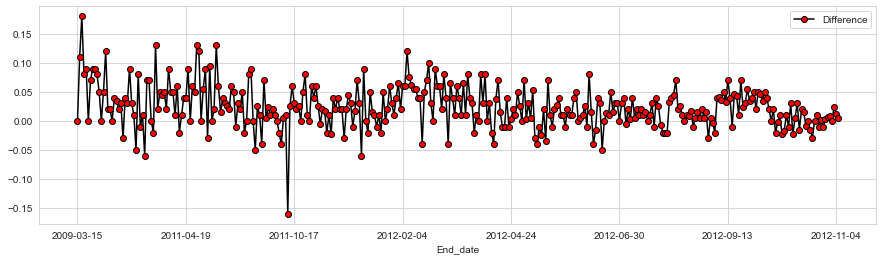

In [674]:
poll_df.plot('End_date','Difference',linestyle='-',marker='o',figsize=(15,4),color='black',markerfacecolor='red')

#### at the end date we see a massive support for both parties, lets investigate

In [675]:
poll_df[poll_df['Difference'] < -0.10]           #### Romney major support 

,End_date,Observations,Obama,Romney,Others,Questions,Winner_Num,Difference
97,2011-10-07,602.0,37.0,53.0,10.0,1.0,1.0,-0.16


In [676]:
poll_df[poll_df['Difference'] > 0.15]             #### Obama major support 

,End_date,Observations,Obama,Romney,Others,Questions,Winner_Num,Difference
2,2009-05-18,1000.0,53.0,35.0,12.0,1.0,0.0,0.18


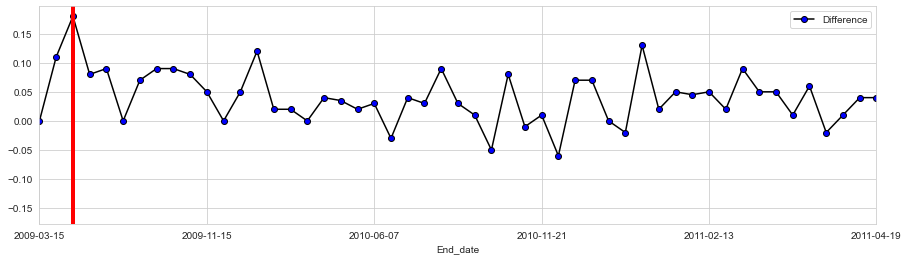

In [677]:
poll_df.plot('End_date','Difference',linestyle='-',marker='o',figsize=(15,4),xlim=(0,50),color='black',markerfacecolor='blue')

plt.axvline(x=2,linewidth=4,color='red')


#### one thing to note with Obama is that the support is constant with this major peak while in Romney case the peaks are more but the support is not constant like here

In [678]:
#### I don't think there much more left to explore from this data set so we will move forward with donor data set now

In [679]:
#############################################################################
############## Part VI - EDA - Donor Data Set
#############################################################################

In [680]:

donor_df = pd.read_csv('Election_Donor_Data.csv')

#### ignore the warning, its column 6 with mixed values

C:\Users\USER\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3267: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [681]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [682]:
donor_df[donor_df.duplicated()]                     #### will drop them

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
23,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,950357610.0,MILPITS MATERIALS,MANAGER,2500.0,17-JUN-11,NaN,NaN,NaN,SA17A,736166
84,C00410118,P20002978,"Bachmann, Michelle","MCVANEY, CAROLE",LITTLETON,CO,801205651.0,NONE,RETIRED,2500.0,13-JUN-11,NaN,NaN,NaN,SA17A,736166
87,C00410118,P20002978,"Bachmann, Michelle","POTTER, WILLIAM",STEAMBOAT SPRINGS,CO,804879119.0,RETIRED,RETIRED,200.0,13-JUN-11,NaN,NaN,NaN,SA17A,736166
161,C00410118,P20002978,"Bachmann, Michelle","GARBERG, DENNIS",OVERLAND PARK,KS,662121860.0,THE SUNFLOWER GROUP,BUSINESS OWNER,400.0,13-JUN-11,NaN,NaN,NaN,SA17A,736166
183,C00410118,P20002978,"Bachmann, Michelle","RITCHIE, WILLIAM",BETHESDA,MD,208161308.0,NONE,RETIRED,100.0,05-AUG-11,NaN,NaN,NaN,SA17A,749073
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000493,C00500587,P20003281,"Perry, Rick","WILSON, JOANNE G. MRS.",HOUSTON,TX,770272919,RIVER OAKS FINANCIAL,DIRECTOR,100.0,28-OCT-11,REDESIGNATION FROM PRIMARY,X,REDESIGNATION FROM PRIMARY,SA17A,772060
1000566,C00500587,P20003281,"Perry, Rick","HUNT, JACK",AUSTIN,TX,787501655,BEST WESTERN,AGM,25.0,01-NOV-11,NaN,NaN,NaN,SA17A,772060
1000673,C00500587,P20003281,"Perry, Rick","WILSON, JOANNE G. MRS.",HOUSTON,TX,770272919,RIVER OAKS FINANCIAL,DIRECTOR,-100.0,28-OCT-11,REDESIGNATION TO GENERAL,X,REDESIGNATION TO GENERAL,SA17A,772060
1001124,C00500587,P20003281,"Perry, Rick","CLARK, JUDY MRS.",AMARILLO,TX,79106,RETIRED,RETIRED,25.0,19-JAN-12,NaN,NaN,NaN,SA17A,771626


In [683]:
donor_df = donor_df.drop_duplicates()

In [684]:
donor_df[donor_df.duplicated()]                   #### no duplicates left

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num


In [685]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972577 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            972577 non-null  object 
 1   cand_id            972577 non-null  object 
 2   cand_nm            972577 non-null  object 
 3   contbr_nm          972577 non-null  object 
 4   contbr_city        972558 non-null  object 
 5   contbr_st          972573 non-null  object 
 6   contbr_zip         972471 non-null  object 
 7   contbr_employer    959618 non-null  object 
 8   contbr_occupation  964853 non-null  object 
 9   contb_receipt_amt  972577 non-null  float64
 10  contb_receipt_dt   972577 non-null  object 
 11  receipt_desc       13393 non-null   object 
 12  memo_cd            86651 non-null   object 
 13  memo_text          91716 non-null   object 
 14  form_tp            972577 non-null  object 
 15  file_num           972577 non-null  int64  
dtypes

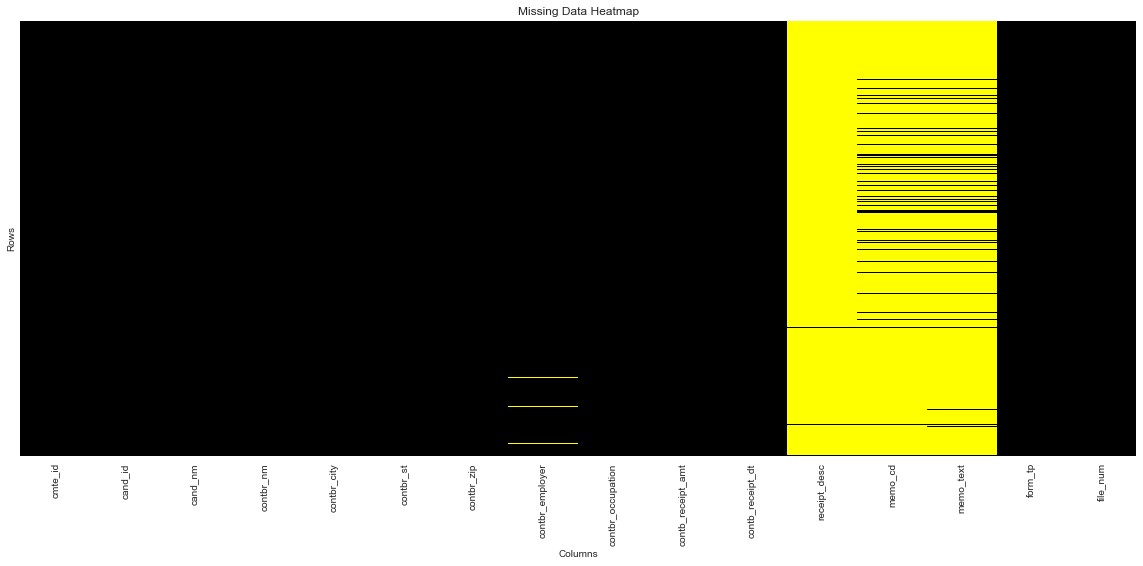

In [686]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(donor_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')



In [687]:
donor_df[donor_df.contbr_employer.isnull()]                              #### we will fill this up with unknown, dropping this many rows will not benefit us

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
41,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,950357610.0,NaN,NaN,-1500.0,20-JUN-11,Refund,NaN,NaN,SB28A,736166
264,C00410118,P20002978,"Bachmann, Michelle","BISHOP, GERARD",WESTHAMPTON BEACH,NY,119780366.0,NaN,NaN,-1700.0,28-JUN-11,Refund,NaN,NaN,SB28A,736166
752,C00431171,P80003353,"Romney, Mitt","KNIGHT, RENA",MERIDIANVILLE,AL,35759.0,NaN,NaN,-60.0,07-MAR-12,Refund,NaN,NaN,SB28A,780128
897,C00431171,P80003353,"Romney, Mitt",THE STEWART FIRM L.L.C.,BIRMINGHAM,AL,352033819.0,NaN,NaN,250.0,23-MAR-12,NaN,NaN,ATTRIBUTION TO PARTNERS REQUESTED,SA17A,780128
1033,C00431171,P80003353,"Romney, Mitt","SELLERS, LEE",MONTGOMERY,AL,36111.0,NaN,NaN,-120.0,20-JAN-12,Refund,NaN,NaN,SB28A,771933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001715,C00500587,P20003281,"Perry, Rick",TEXAS ENERGY L.L.C.,CHEYENNE,WY,820013163,NaN,NaN,250.0,30-SEP-11,NaN,NaN,ATTRIBUTION TO PARTNERS REQUESTED,SA17A,751678
1001717,C00500587,P20003281,"Perry, Rick","HARDER, ROBERT",POWELL,WY,824359238,NaN,RETIRED,100.0,12-NOV-11,NaN,NaN,NaN,SA17A,772060
1001720,C00500587,P20003281,"Perry, Rick","HARDER, ROBERT",POWELL,WY,824359238,NaN,RETIRED,100.0,01-OCT-11,NaN,NaN,NaN,SA17A,772060
1001722,C00500587,P20003281,"Perry, Rick","HARDER, ROBERT",POWELL,WY,824359238,NaN,RETIRED,100.0,29-OCT-11,NaN,NaN,NaN,SA17A,772060


In [688]:
donor_df['contbr_employer'] = donor_df['contbr_employer'].fillna('Unknown')

In [689]:
donor_df[donor_df.contbr_employer.isnull()]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num


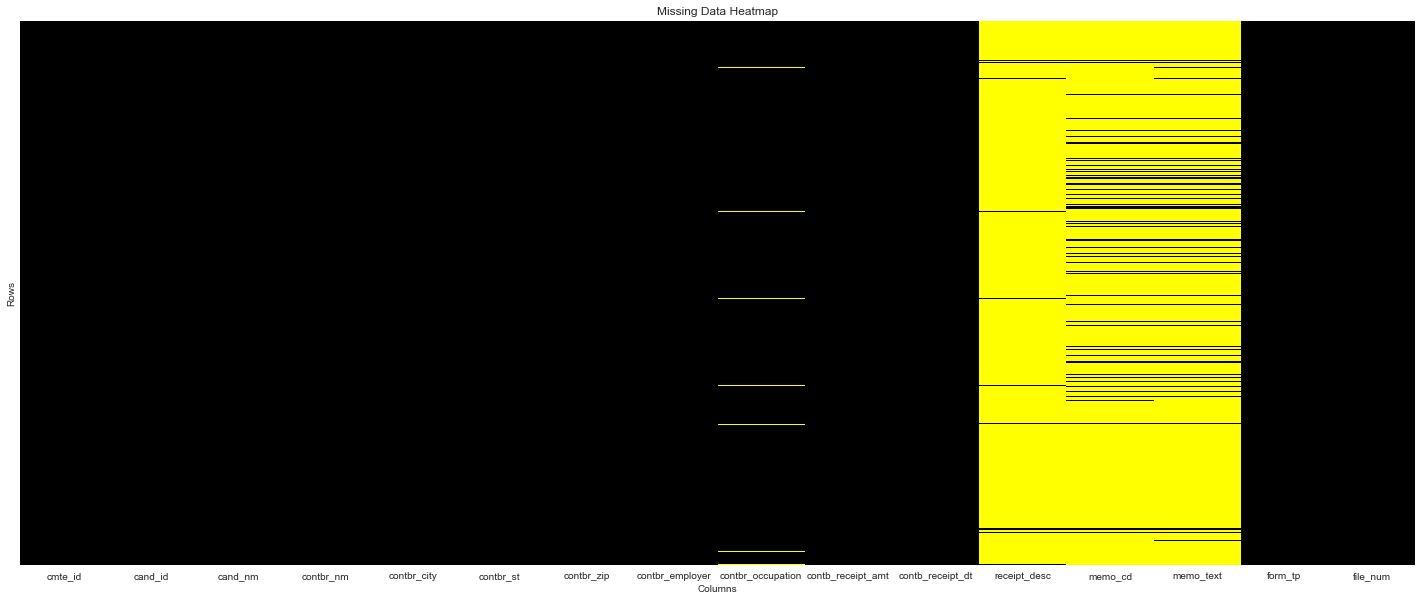

In [690]:
fig, ax = plt.subplots(figsize=(25,10))

sns.heatmap(donor_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


In [691]:
donor_df[donor_df.contbr_occupation.isnull()]                     #### lets make this one Unknown too

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num
41,C00410118,P20002978,"Bachmann, Michelle","MINNIS, RITA",MILPITAS,CA,950357610.0,Unknown,NaN,-1500.0,20-JUN-11,Refund,NaN,NaN,SB28A,736166
264,C00410118,P20002978,"Bachmann, Michelle","BISHOP, GERARD",WESTHAMPTON BEACH,NY,119780366.0,Unknown,NaN,-1700.0,28-JUN-11,Refund,NaN,NaN,SB28A,736166
752,C00431171,P80003353,"Romney, Mitt","KNIGHT, RENA",MERIDIANVILLE,AL,35759.0,Unknown,NaN,-60.0,07-MAR-12,Refund,NaN,NaN,SB28A,780128
897,C00431171,P80003353,"Romney, Mitt",THE STEWART FIRM L.L.C.,BIRMINGHAM,AL,352033819.0,Unknown,NaN,250.0,23-MAR-12,NaN,NaN,ATTRIBUTION TO PARTNERS REQUESTED,SA17A,780128
1033,C00431171,P80003353,"Romney, Mitt","SELLERS, LEE",MONTGOMERY,AL,36111.0,Unknown,NaN,-120.0,20-JAN-12,Refund,NaN,NaN,SB28A,771933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001460,C00500587,P20003281,"Perry, Rick","YOW, JOAN",WINCHESTER,VA,22601,Unknown,NaN,250.0,04-JAN-12,NaN,NaN,NaN,SA17A,771626
1001537,C00500587,P20003281,"Perry, Rick","BROETJE, RALPH",PRESCOTT,WA,99348,Unknown,NaN,-2500.0,31-MAR-12,Refund,NaN,GENERAL REFUND,SB28A,779144
1001600,C00500587,P20003281,"Perry, Rick",JOHNSON GLOBAL,APPLETON,WI,54911,Unknown,NaN,-500.0,02-NOV-11,Refund,NaN,NaN,SB28A,772060
1001710,C00500587,P20003281,"Perry, Rick","PHILLIPS, JIMMY",BECKLEY,WV,25801,Unknown,NaN,-2500.0,31-MAR-12,Refund,NaN,GENERAL REFUND,SB28A,779144


In [692]:
donor_df['contbr_occupation'] = donor_df['contbr_occupation'].fillna('Unknown')

In [693]:
donor_df[donor_df.contbr_occupation.isnull()]                #### done

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num


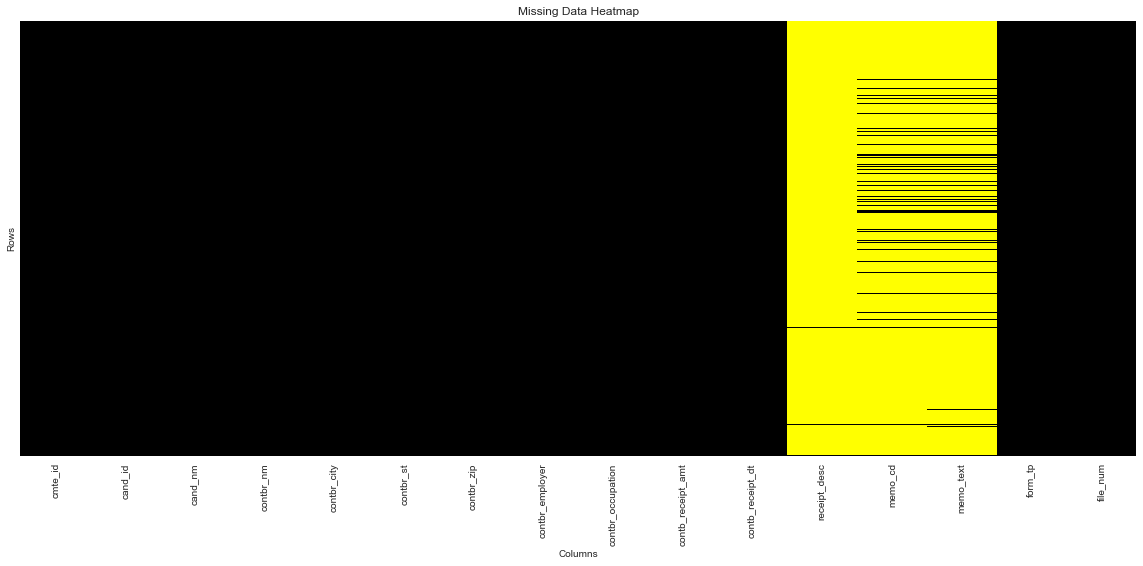

In [694]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(donor_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')


In [695]:
donor_df.receipt_desc                     #### we will drop this one for obvious reasons

0                                                        NaN
1                                                        NaN
2                                                        NaN
3                                                        NaN
4                                                        NaN
                                 ...                        
1001726    REATTRIBUTION / REDESIGNATION REQUESTED (AUTOM...
1001727                                                  NaN
1001728                                                  NaN
1001729                                                  NaN
1001730                                                  NaN
Name: receipt_desc, Length: 972577, dtype: object

In [696]:
donor_df.memo_cd.unique()                      #### this column as well

array([nan, 'X'], dtype=object)

In [697]:
donor_df.memo_text.head()                      #### we wouldn't be working with column either

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: memo_text, dtype: object

In [698]:
donor_df.drop(columns=['receipt_desc','memo_cd','memo_text'],inplace=True)

In [699]:
donor_df.isnull().any()

cmte_id              False
cand_id              False
cand_nm              False
contbr_nm            False
contbr_city           True
contbr_st             True
contbr_zip            True
contbr_employer      False
contbr_occupation    False
contb_receipt_amt    False
contb_receipt_dt     False
form_tp              False
file_num             False
dtype: bool

In [700]:
donor_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972577 entries, 0 to 1001730
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            972577 non-null  object 
 1   cand_id            972577 non-null  object 
 2   cand_nm            972577 non-null  object 
 3   contbr_nm          972577 non-null  object 
 4   contbr_city        972558 non-null  object 
 5   contbr_st          972573 non-null  object 
 6   contbr_zip         972471 non-null  object 
 7   contbr_employer    972577 non-null  object 
 8   contbr_occupation  972577 non-null  object 
 9   contb_receipt_amt  972577 non-null  float64
 10  contb_receipt_dt   972577 non-null  object 
 11  form_tp            972577 non-null  object 
 12  file_num           972577 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 103.9+ MB


In [701]:
donor_df.dropna(subset=['contbr_city','contbr_st','contbr_zip'],inplace=True)

In [702]:
donor_df.isna().any()

cmte_id              False
cand_id              False
cand_nm              False
contbr_nm            False
contbr_city          False
contbr_st            False
contbr_zip           False
contbr_employer      False
contbr_occupation    False
contb_receipt_amt    False
contb_receipt_dt     False
form_tp              False
file_num             False
dtype: bool

In [703]:
donor_df.info()                              #### now its clean data

<class 'pandas.core.frame.DataFrame'>
Int64Index: 972450 entries, 0 to 1001730
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   cmte_id            972450 non-null  object 
 1   cand_id            972450 non-null  object 
 2   cand_nm            972450 non-null  object 
 3   contbr_nm          972450 non-null  object 
 4   contbr_city        972450 non-null  object 
 5   contbr_st          972450 non-null  object 
 6   contbr_zip         972450 non-null  object 
 7   contbr_employer    972450 non-null  object 
 8   contbr_occupation  972450 non-null  object 
 9   contb_receipt_amt  972450 non-null  float64
 10  contb_receipt_dt   972450 non-null  object 
 11  form_tp            972450 non-null  object 
 12  file_num           972450 non-null  int64  
dtypes: float64(1), int64(1), object(11)
memory usage: 103.9+ MB


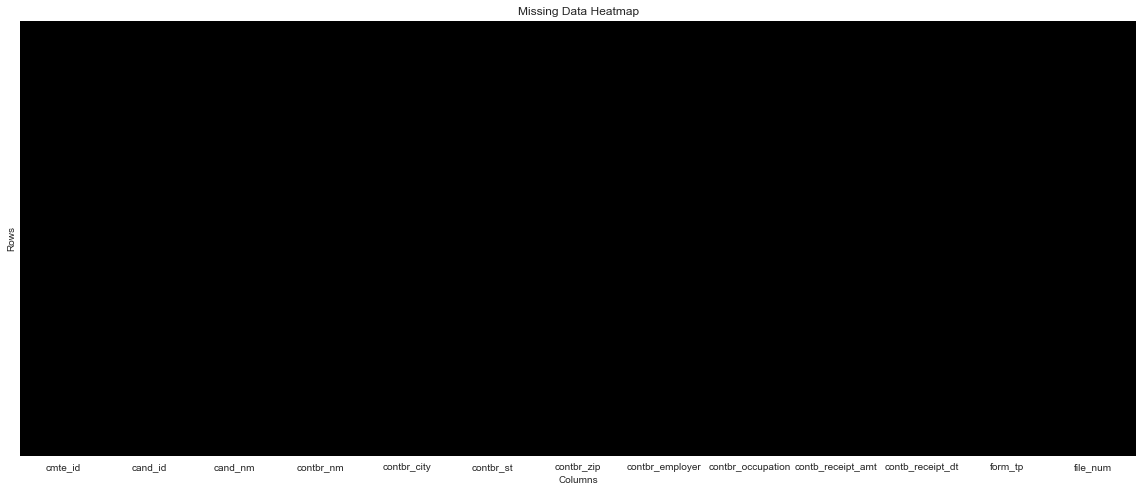

In [704]:
fig, ax = plt.subplots(figsize=(20,8))

sns.heatmap(donor_df.isnull(),yticklabels=False,cbar=False,cmap=Amelia,ax=ax)

ax.set_xlabel('Columns')
ax.set_ylabel('Rows')
ax.set_title('Missing Data Heatmap')

plt.savefig('Donor_missing_data_heatmap_4.jpeg', dpi=300, bbox_inches='tight')


In [705]:
donor_df.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166


In [706]:
donor_df.contb_receipt_amt.value_counts()           #### seems like 100 is the most popular amount donated here

100.00     174866
50.00      134278
25.00      106405
250.00      90416
500.00      57340
            ...  
448.05          1
173.02          1
26.76           1
70.72           1
2408.79         1
Name: contb_receipt_amt, Length: 8077, dtype: int64

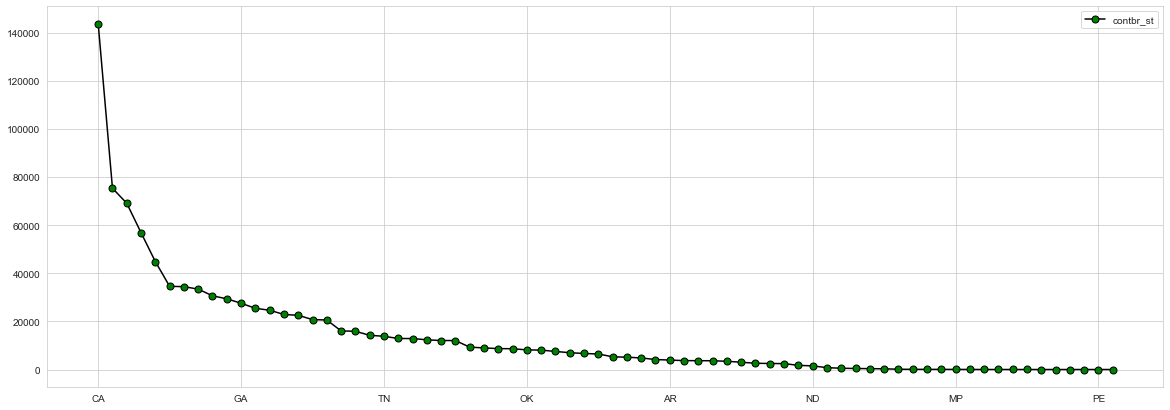

In [707]:
donor_df.contbr_st.value_counts().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='black',markersize=7)

#### seems like CA is the highest donor state

In [708]:
donor_df.contbr_st.value_counts()

CA    143765
TX     75325
NY     69101
FL     56862
IL     44856
       ...  
QU         1
UK         1
NS         1
PE         1
SO         1
Name: contbr_st, Length: 72, dtype: int64

In [709]:
#### getting the mean and standard deviation for the amounts donated

donor_df.contb_receipt_amt.mean()

290.72591073055116

In [710]:
donor_df.contb_receipt_amt.std()

3801.5542542192256

In [711]:
#### we see a huge difference in the mean and standard deviation which should never be the case

amount_df = donor_df.contb_receipt_amt.copy()

In [712]:
donor_df.describe()

,contb_receipt_amt,file_num
count,9.724500e+05,972450.000000
mean,2.907259e+02,774535.005019
std,3.801554e+03,10564.627473
min,-3.080000e+04,723511.000000
25%,3.500000e+01,771927.000000
50%,1.000000e+02,779227.000000
75%,2.500000e+02,780234.000000
max,2.014491e+06,787803.000000


In [713]:
amount_df[amount_df < 0].value_counts()            #### this doesn't make sense so we will drop these for now

-2500.00    2667
-500.00      737
-100.00      687
-1000.00     579
-250.00      454
            ... 
-78.18         1
-78.75         1
-64.00         1
-2040.00       1
-200.09        1
Name: contb_receipt_amt, Length: 752, dtype: int64

In [714]:
amount_df = amount_df[amount_df > 1]

In [715]:
amount_df[amount_df < 0].value_counts()              #### got rid of donors who donated less then 1

Series([], Name: contb_receipt_amt, dtype: int64)

In [716]:
amount_df.value_counts()                 #### much better

100.00     174866
50.00      134278
25.00      106405
250.00      90416
500.00      57340
            ...  
89.73           1
136.12          1
103.12          1
95.37           1
2408.79         1
Name: contb_receipt_amt, Length: 7314, dtype: int64

In [717]:
#### now lets see the avg and std

amount_df.mean()

304.687826334435

In [718]:
amount_df.std()            #### the only viable reason for his has to be some strong outliers, we will sort that out further down

3816.7695844609084

In [719]:
amount_df[amount_df < 1]            #### amount df has nothing less then 1 

Series([], Name: contb_receipt_amt, dtype: float64)

In [720]:
top_10 = amount_df.sort_values().value_counts().head(10)

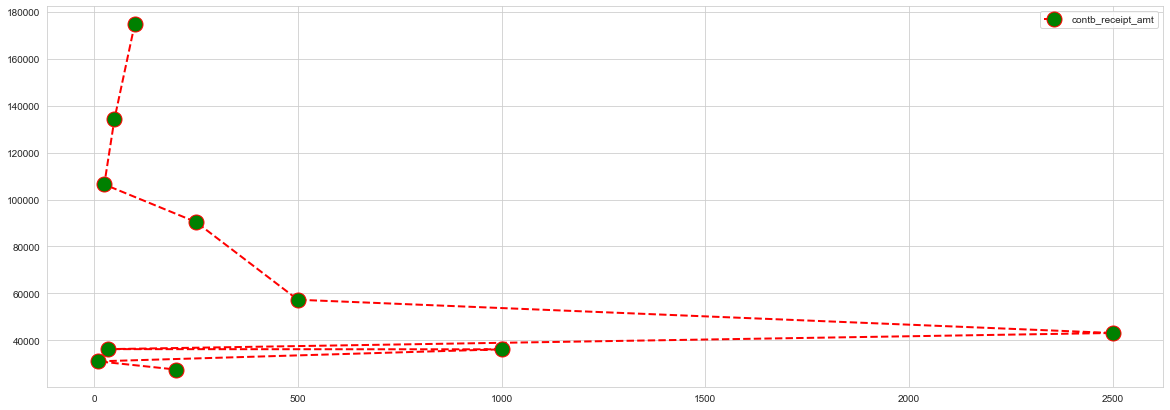

In [721]:
top_10.plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='green',color='red',markersize=15,linestyle='dashed',linewidth=2)


#### in the top 10 we see the most is around 100 then it starts dipping but the donation increases but then it goes back to 1-100 range

In [722]:
top_10               #### 100 is the most common followed by 50

100.0     174866
50.0      134278
25.0      106405
250.0      90416
500.0      57340
2500.0     43196
35.0       36325
1000.0     36245
10.0       31129
200.0      27654
Name: contb_receipt_amt, dtype: int64

In [723]:
donor_df.drop(columns=['cmte_id','cand_id'],inplace=True)

donor_df.head()

#### for now we are dropping these two columns

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166


In [724]:
donor_df.cand_nm.unique()         #### we can do some feature engineering on this one


array(['Bachmann, Michelle', 'Romney, Mitt', 'Obama, Barack',
       "Roemer, Charles E. 'Buddy' III", 'Pawlenty, Timothy',
       'Johnson, Gary Earl', 'Paul, Ron', 'Santorum, Rick',
       'Cain, Herman', 'Gingrich, Newt', 'McCotter, Thaddeus G',
       'Huntsman, Jon', 'Perry, Rick'], dtype=object)

In [725]:
#### making a new column for party 

party_map = {'Bachmann, Michelle': 'Republican',
           'Cain, Herman': 'Republican',
           'Gingrich, Newt': 'Republican',
           'Huntsman, Jon': 'Republican',
           'Johnson, Gary Earl': 'Republican',
           'McCotter, Thaddeus G': 'Republican',
           'Obama, Barack': 'Democrat',
           'Paul, Ron': 'Republican',
           'Pawlenty, Timothy': 'Republican',
           'Perry, Rick': 'Republican',
           "Roemer, Charles E. 'Buddy' III": 'Republican',
           'Romney, Mitt': 'Republican',
           'Santorum, Rick': 'Republican'}

In [726]:
donor_df['Party'] = donor_df.cand_nm.map(party_map)

In [727]:
donor_df.Party.value_counts()                       #### seems like we have more Dem party

Democrat      569555
Republican    402895
Name: Party, dtype: int64

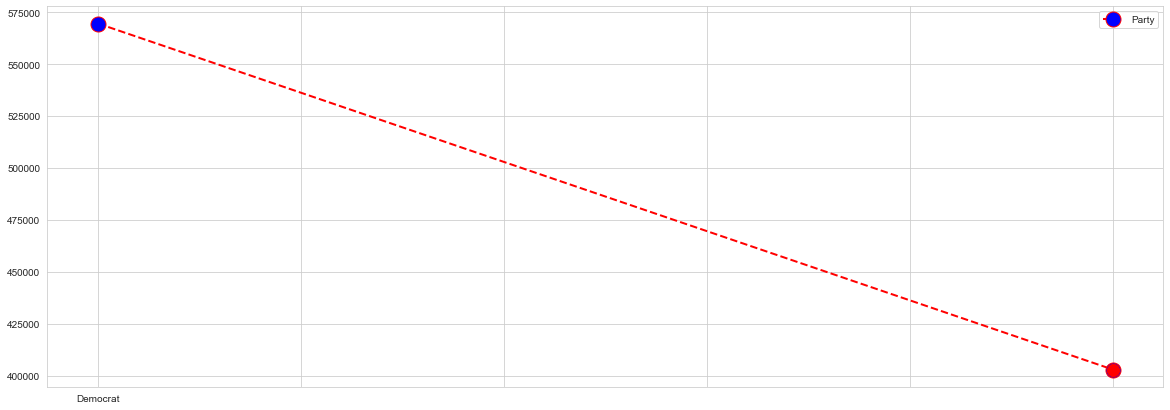

In [728]:
donor_df.Party.value_counts().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='blue',color='red',markersize=15,linestyle='dashed',linewidth=2)

plt.scatter(donor_df.Party.value_counts().index[0], donor_df.Party.value_counts().iloc[0], color='blue', s=150, zorder=5)

plt.scatter(donor_df.Party.value_counts().index[1], donor_df.Party.value_counts().iloc[1], color='red', s=150, zorder=5)

#### honestly the difference is quite big here as you can literally see

In [729]:
donor_df.contb_receipt_amt.min()

-30800.0

In [730]:
donor_df = donor_df[donor_df.contb_receipt_amt > 1]

In [731]:
donor_df.contb_receipt_amt.min()

1.01

In [732]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

cand_nm
Bachmann, Michelle                2.651251e+06
Cain, Herman                      6.991525e+06
Gingrich, Newt                    1.268201e+07
Huntsman, Jon                     3.319429e+06
Johnson, Gary Earl                5.502991e+05
McCotter, Thaddeus G              3.903000e+04
Obama, Barack                     1.205647e+08
Paul, Ron                         2.090798e+07
Pawlenty, Timothy                 5.876433e+06
Perry, Rick                       2.026563e+07
Roemer, Charles E. 'Buddy' III    3.721779e+05
Romney, Mitt                      8.809885e+07
Santorum, Rick                    1.092687e+07
Name: contb_receipt_amt, dtype: float64

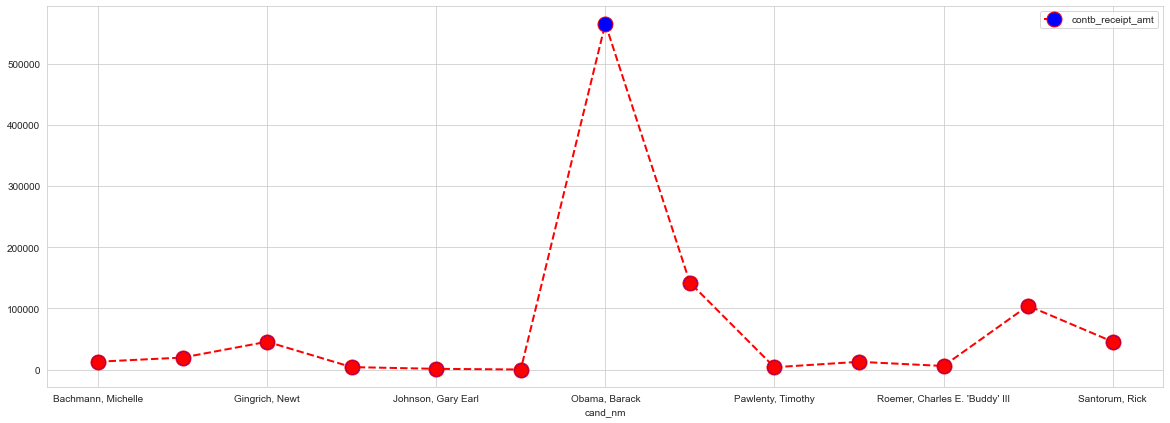

In [733]:
donor_df.groupby('cand_nm')['contb_receipt_amt'].count().plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='blue',color='red',markersize=15,linestyle='dashed',linewidth=2)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[0], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[0], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[1], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[1], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[2], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[2], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[3], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[3], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[4], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[4], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[5], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[5], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[6], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[6], color='blue', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[7], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[7], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[8], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[8], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[9], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[9], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[10], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[10], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[11], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[11], color='red', s=150, zorder=5)

plt.scatter(donor_df.groupby('cand_nm')['contb_receipt_amt'].count().index[12], donor_df.groupby('cand_nm')['contb_receipt_amt'].count().iloc[12], color='red', s=150, zorder=5)

#### we see the donations for Obama is the highest and it gets all distributed between other Republicans 

In [734]:
cand_amount = donor_df.groupby('cand_nm')['contb_receipt_amt'].sum()

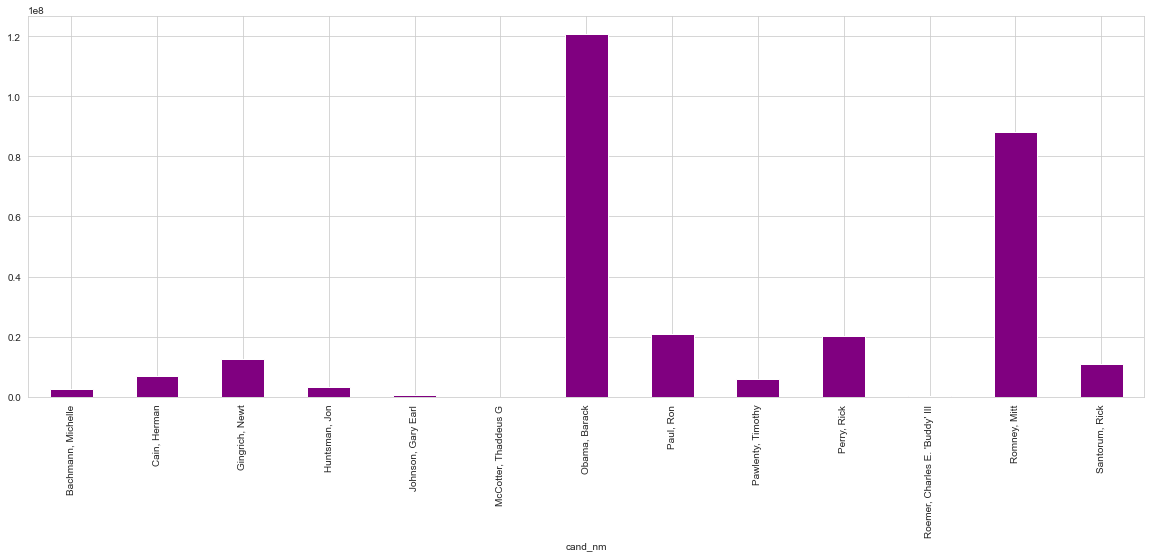

In [735]:
cand_amount.plot(kind='bar',figsize=(20,7),color='purple')

#### the republicans donations gets distributed while Obama is the only candidate from Democrats, hence the huge margine

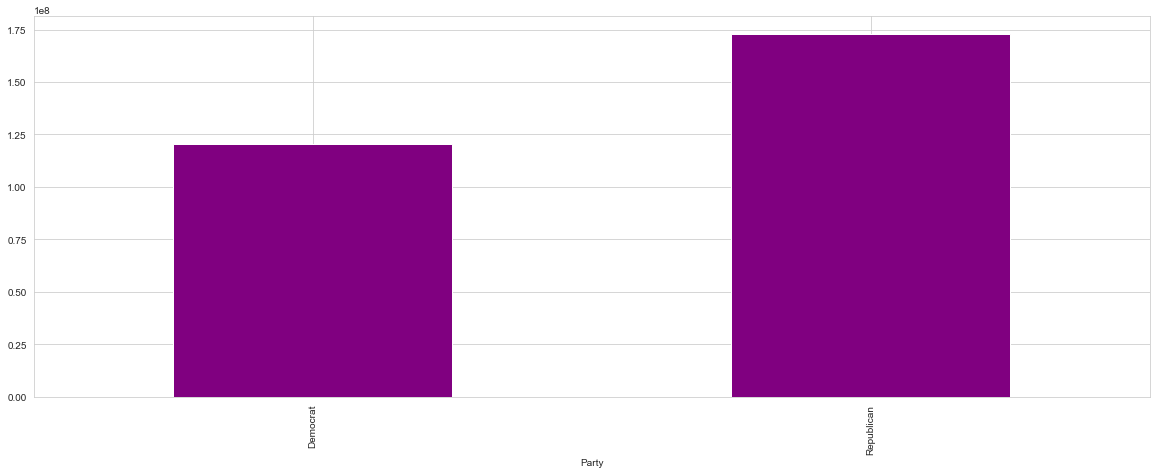

In [736]:
donor_df.groupby('Party')['contb_receipt_amt'].sum().plot(kind='bar',figsize=(20,7),color='purple')


#### this is interesting because if you sum all the donors then Republicans win, but because Democrat have only one candidate while Republicans have many, it acts to their disadvantage

In [737]:
donor_df[['contbr_st','contb_receipt_amt','Party']]

,contbr_st,contb_receipt_amt,Party
0,AL,250.0,Republican
1,AL,50.0,Republican
2,AL,250.0,Republican
3,AR,250.0,Republican
4,AR,300.0,Republican
...,...,...,...
1001726,XX,5000.0,Republican
1001727,XX,2500.0,Republican
1001728,XX,500.0,Republican
1001729,XX,500.0,Republican


In [738]:
heat = donor_df.groupby(['contbr_st','Party'])['contb_receipt_amt'].sum().unstack()

heat.head()

Party,Democrat,Republican
contbr_st,,
AA,14170.00,1561.20
AE,42703.75,74979.83
AF,NaN,495.00
AK,272061.15,314295.72
AL,511023.98,1305238.88


In [739]:
heat_filled = heat.fillna(0)                     #### filled Nan with 0 values

heat_filled.head()

Party,Democrat,Republican
contbr_st,,
AA,14170.00,1561.20
AE,42703.75,74979.83
AF,0.00,495.00
AK,272061.15,314295.72
AL,511023.98,1305238.88


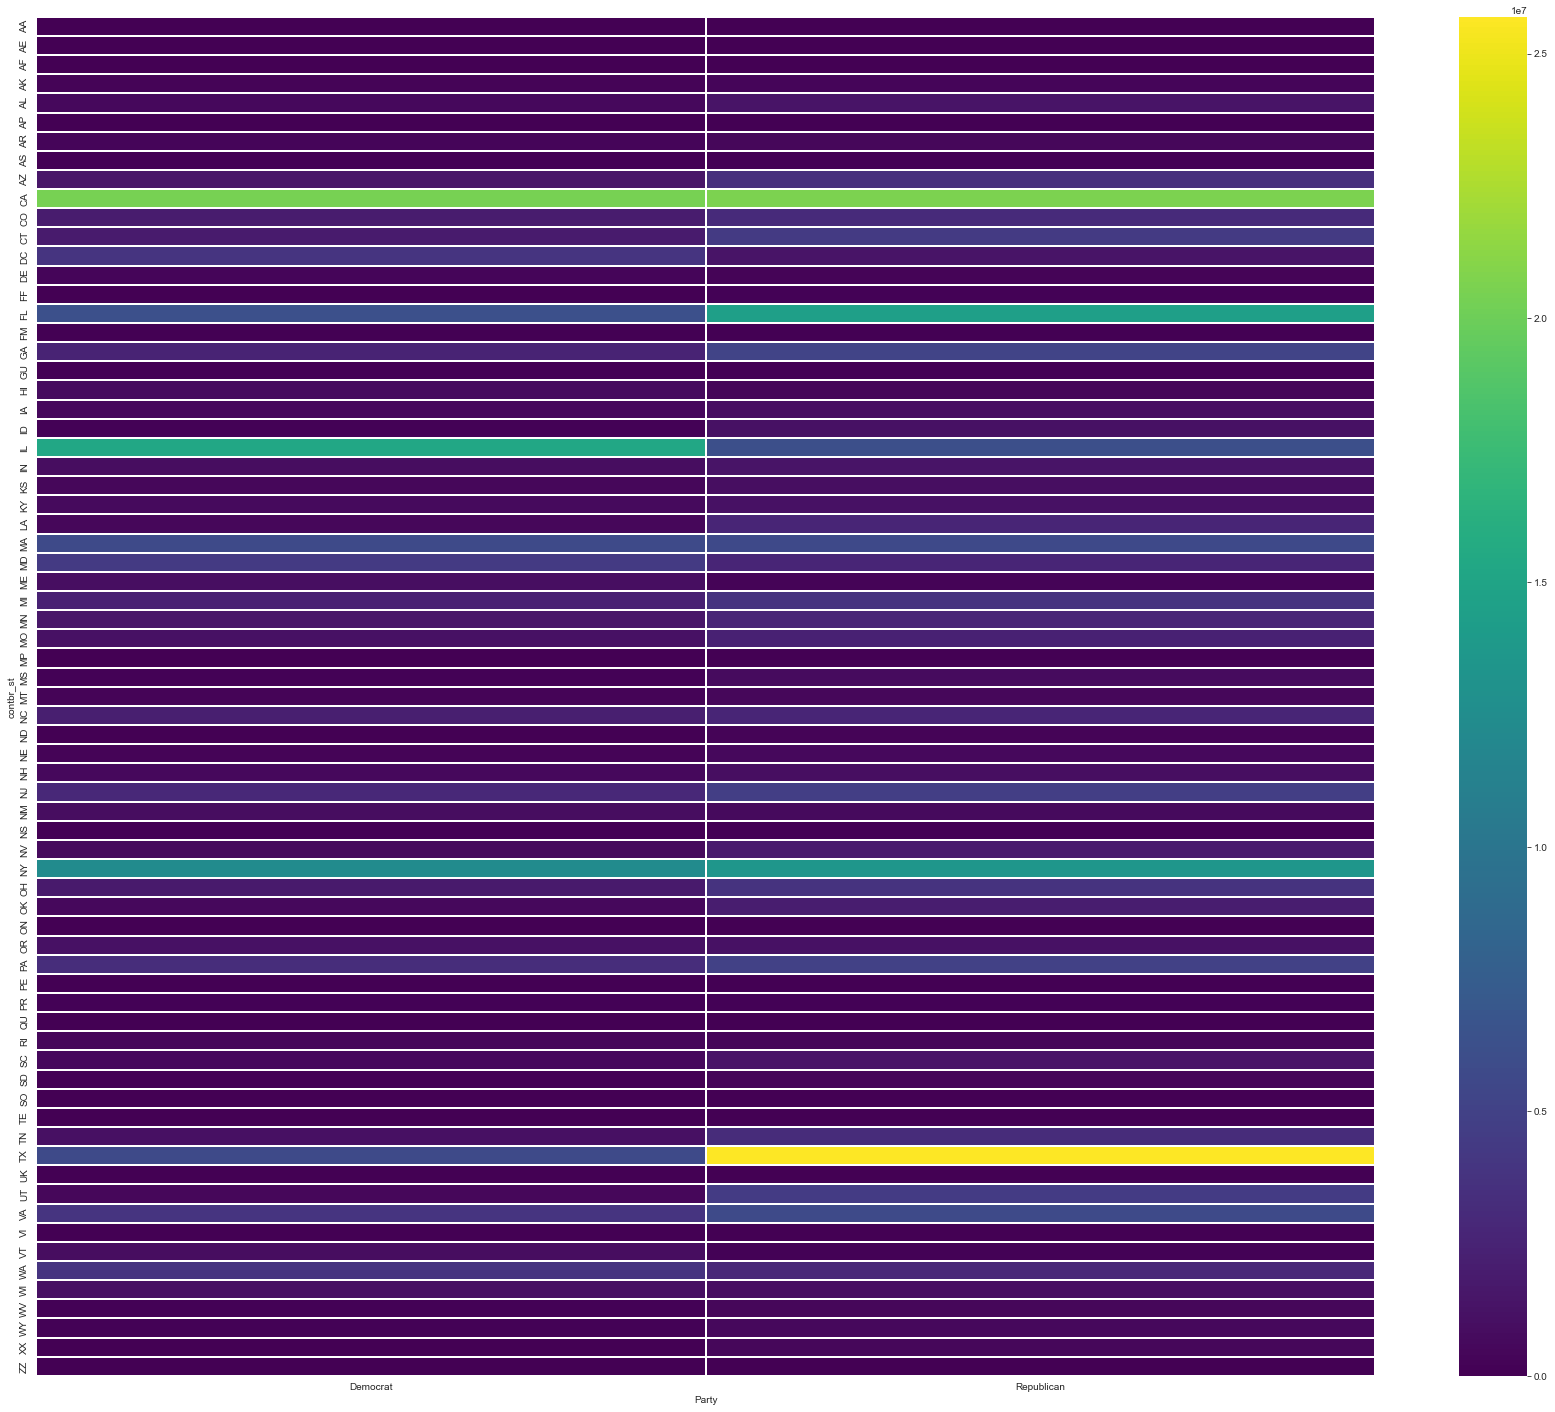

In [740]:
fig, ax = plt.subplots(figsize=(30,25)) 

sns.heatmap(heat_filled,linewidths=0.1,ax=ax,cmap='viridis')


#### this is very important info, from this we can derive which state supports which party the most
#### it seems like Democrats have California as their strongest state while Republicans have texas as their strongest state

In [741]:
heat_filled.sort_values(by='Republican',ascending=False).head(10)           #### top 10 Republican state donations

Party,Democrat,Republican
contbr_st,,
TX,5792097.75,25695124.93
CA,20414317.44,20650482.78
FL,6299056.83,14395977.28
NY,12302792.51,13522724.51
IL,15317141.17,6200467.96
VA,3903612.55,5735804.31
MA,5755974.81,5698112.16
GA,2469485.99,5208571.41
PA,3281658.78,5008395.47


In [742]:
Rep_heat = heat_filled.sort_values(by='Republican',ascending=False).head(10)

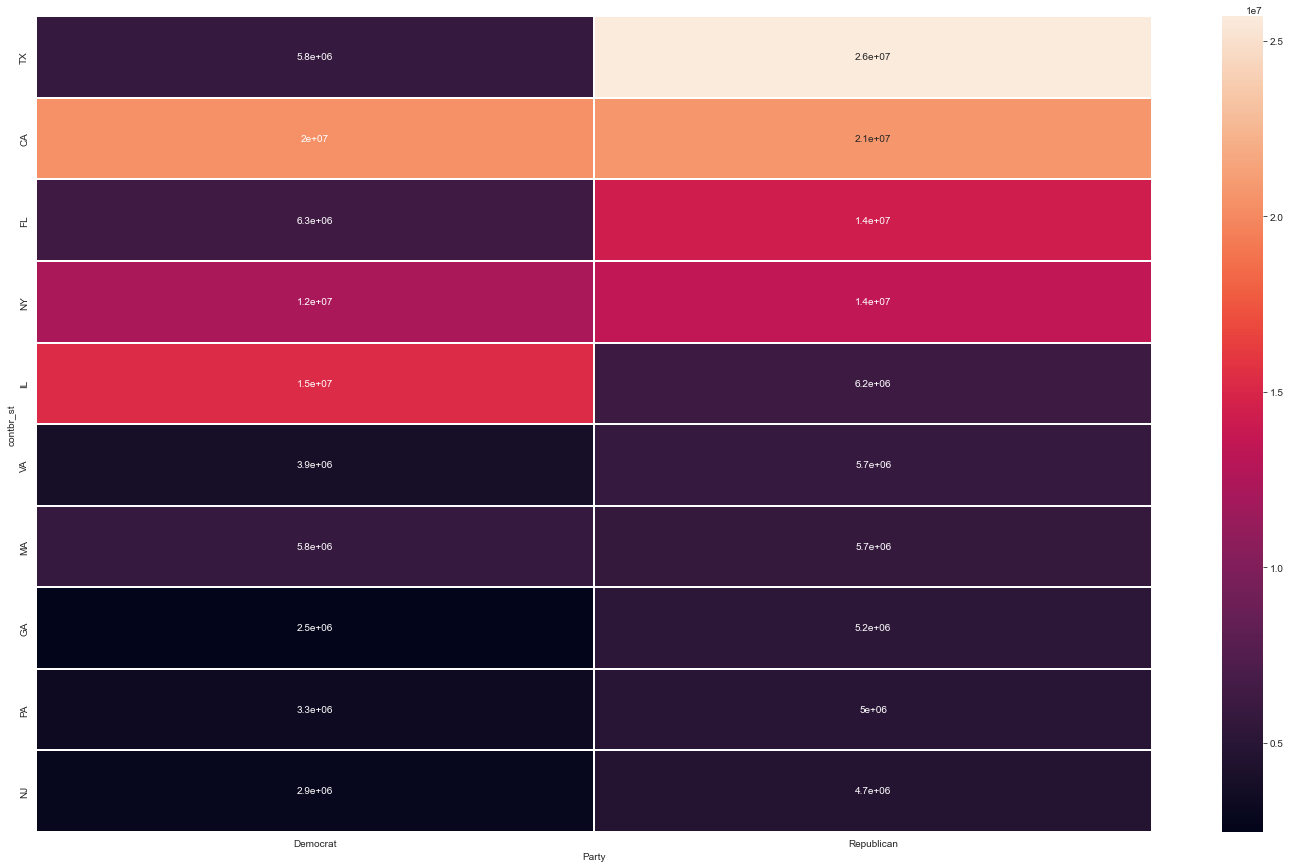

In [743]:
fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(Rep_heat,linewidths=0.1,ax=ax,annot=True)


#### this is republicans donation top 10 state and the scale is in dollars

In [744]:
heat_filled.sort_values(by='Democrat',ascending=False).head(10)            #### top 10 Democrats state donation wise

Party,Democrat,Republican
contbr_st,,
CA,20414317.44,20650482.78
IL,15317141.17,6200467.96
NY,12302792.51,13522724.51
FL,6299056.83,14395977.28
TX,5792097.75,25695124.93
MA,5755974.81,5698112.16
MD,4316138.68,2702882.92
VA,3903612.55,5735804.31
DC,3869392.30,1364749.57


In [745]:
Dem_heat = heat_filled.sort_values(by='Democrat',ascending=False).head(10)

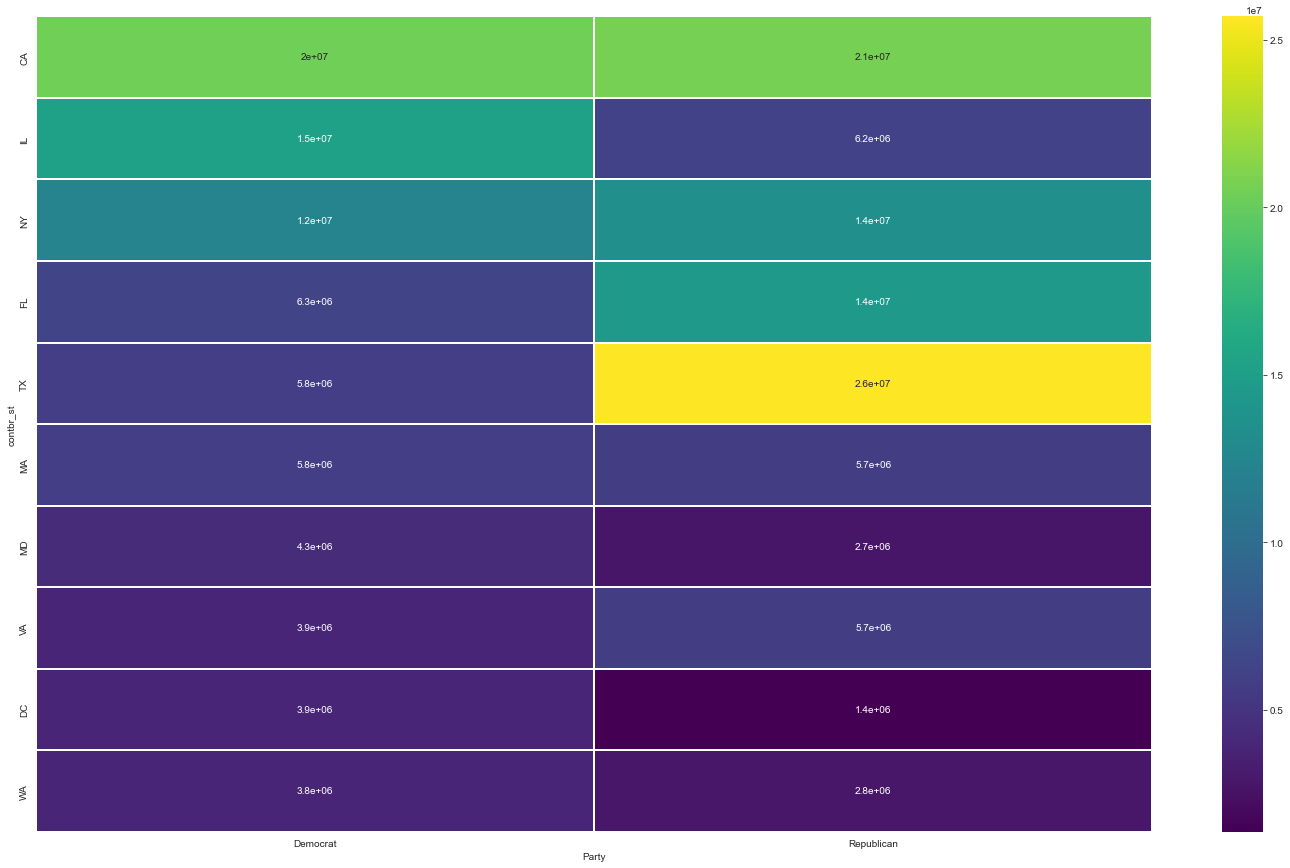

In [746]:
fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(Dem_heat,linewidths=0.1,ax=ax,cmap='viridis',annot=True)

#### this is democrats donation top 10 state and the scale is in dollars

In [747]:
occupation_df = donor_df.copy()

In [748]:
occupation_df = donor_df.groupby(['contbr_occupation','Party'])['contb_receipt_amt'].sum().unstack()

occupation_df

#### now we will do the similar treatment with regards to occupation
#### because it has more then 45k rows we will have to make some adjustment for the data to make any sense here

Party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [749]:
occupation_df = occupation_df[occupation_df.sum(1) > 1000000]

In [750]:
occupation_df.shape               #### now we have 31 rows, it had too many occupation so we have adjusted by telling it to give us only donors more then 1 million combined

(32, 2)

In [751]:
occupation_df.index                         #### we need to comibine CEO and drop information requested

Index(['ATTORNEY', 'BANKER', 'BUSINESS OWNER', 'C.E.O.', 'CEO', 'CHAIRMAN',
       'CONSULTANT', 'ENGINEER', 'EXECUTIVE', 'FINANCE', 'HOMEMAKER',
       'INFORMATION REQUESTED', 'INFORMATION REQUESTED PER BEST EFFORTS',
       'INVESTMENTS', 'INVESTOR', 'LAWYER', 'MANAGER', 'NOT EMPLOYED', 'OWNER',
       'PARTNER', 'PHYSICIAN', 'PRESIDENT', 'PROFESSOR', 'REAL ESTATE',
       'RETIRED', 'SALES', 'SELF-EMPLOYED', 'STUDENT', 'TEACHER', 'Unknown',
       'VICE PRESIDENT', 'WRITER'],
      dtype='object', name='contbr_occupation')

In [752]:
occupation_df.drop(index=['INFORMATION REQUESTED','INFORMATION REQUESTED PER BEST EFFORTS'],inplace=True)

#### ignore the warning, we should have made a copy but it did go through

C:\Users\USER\Anaconda3\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [753]:
occupation_df.index

Index(['ATTORNEY', 'BANKER', 'BUSINESS OWNER', 'C.E.O.', 'CEO', 'CHAIRMAN',
       'CONSULTANT', 'ENGINEER', 'EXECUTIVE', 'FINANCE', 'HOMEMAKER',
       'INVESTMENTS', 'INVESTOR', 'LAWYER', 'MANAGER', 'NOT EMPLOYED', 'OWNER',
       'PARTNER', 'PHYSICIAN', 'PRESIDENT', 'PROFESSOR', 'REAL ESTATE',
       'RETIRED', 'SALES', 'SELF-EMPLOYED', 'STUDENT', 'TEACHER', 'Unknown',
       'VICE PRESIDENT', 'WRITER'],
      dtype='object', name='contbr_occupation')

In [754]:
occupation_df.index = occupation_df.index.to_series().replace('C.E.O.', 'CEO')


In [755]:
occupation_df_combined = occupation_df.groupby(level=0).sum()


In [756]:
occupation_df_combined.index           #### now we have a clean index

Index(['ATTORNEY', 'BANKER', 'BUSINESS OWNER', 'CEO', 'CHAIRMAN', 'CONSULTANT',
       'ENGINEER', 'EXECUTIVE', 'FINANCE', 'HOMEMAKER', 'INVESTMENTS',
       'INVESTOR', 'LAWYER', 'MANAGER', 'NOT EMPLOYED', 'OWNER', 'PARTNER',
       'PHYSICIAN', 'PRESIDENT', 'PROFESSOR', 'REAL ESTATE', 'RETIRED',
       'SALES', 'SELF-EMPLOYED', 'STUDENT', 'TEACHER', 'Unknown',
       'VICE PRESIDENT', 'WRITER'],
      dtype='object', name='contbr_occupation')

In [757]:
occupation_df_combined.shape

(29, 2)

In [758]:
occupation_df_combined.head()

Party,Democrat,Republican
contbr_occupation,,
ATTORNEY,9340923.72,7445625.91
BANKER,189259.40,1253816.73
BUSINESS OWNER,385567.05,1318221.19
CEO,1501084.79,4161815.08
CHAIRMAN,297797.00,1292592.75


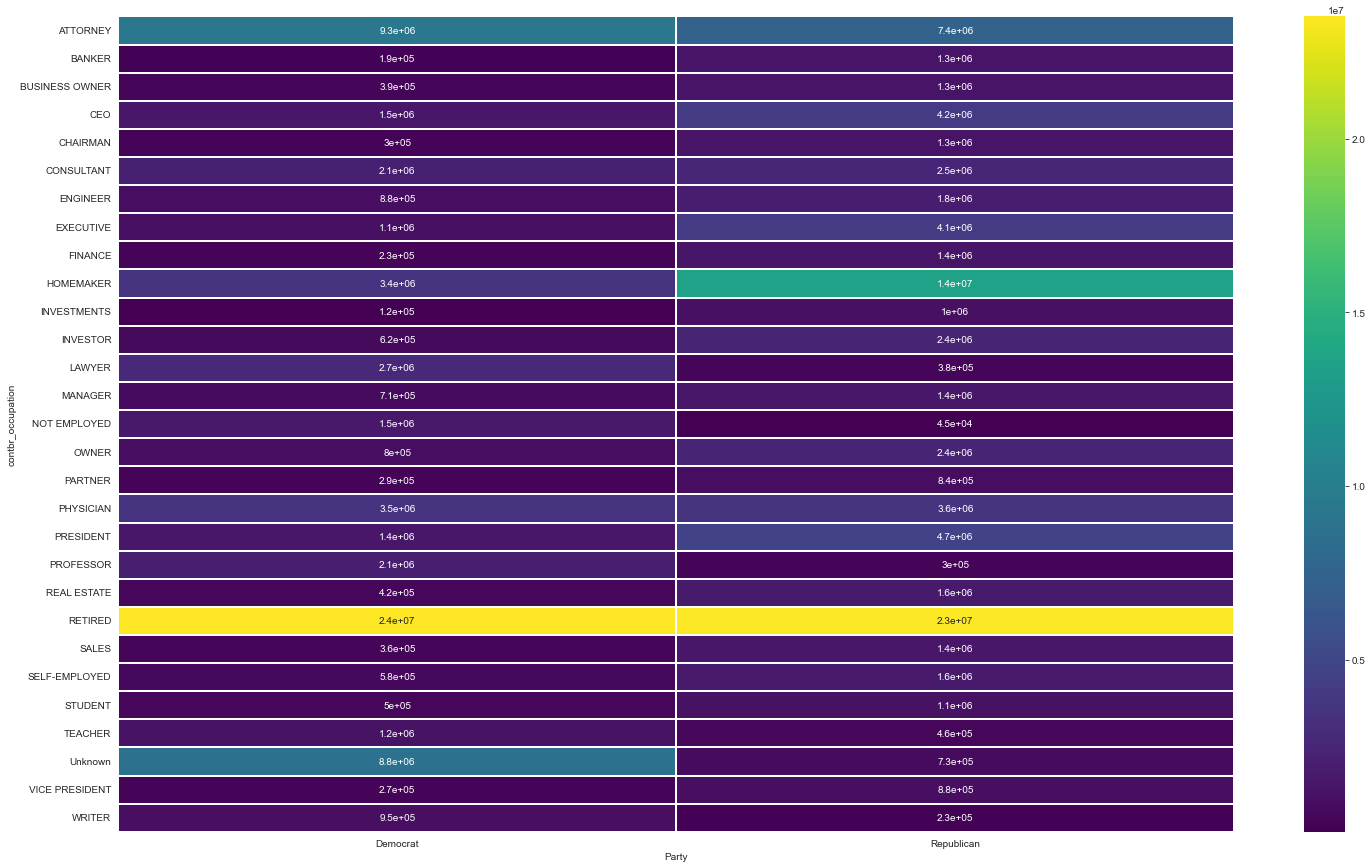

In [759]:
fig, ax = plt.subplots(figsize=(25,15)) 

sns.heatmap(occupation_df_combined,linewidths=0.1,ax=ax,cmap='viridis',annot=True)

#### this is the most holistic approach to see who is donating to whom

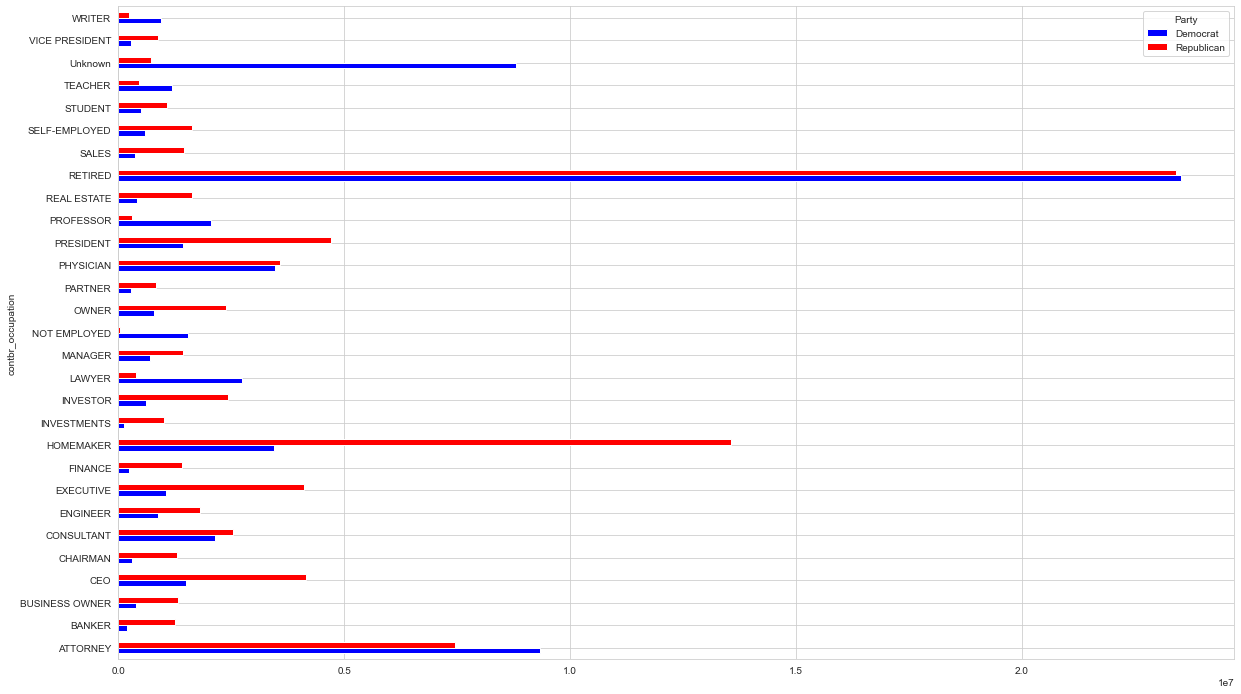

In [760]:
occupation_df_combined.plot(kind='barh',figsize=(20,12),color={'Democrat':'blue',
                                                               'Republican':'red'})

#### I think this is enough for EDA, now lets move to model phase

In [761]:
donor_df['date'] = pd.to_datetime(donor_df['contb_receipt_dt'])

In [762]:
donor_df['month'] = donor_df.date.apply(lambda x:x.month)

donor_df.month.head()

0    6
1    6
2    7
3    8
4    6
Name: month, dtype: int64

In [763]:
donor_df['month_name'] = donor_df.month.map({1:'Jan',
                         2:'Feb',
                         3:'Mar',
                         4:'Apr',
                         5:'May',
                         6:'Jun',
                         7:'Jul',
                         8:'Aug',
                         9:'Sep',
                         10:'Oct',
                         11:'Nov',
                         12:'Dec'})


In [764]:
donor_df['day_of_week'] = donor_df.date.apply(lambda x:x.dayofweek)

In [765]:
donor_df['Day'] = donor_df.day_of_week.map({0:'Mon',
                                     1:'Tue',
                                     2:'Wed',
                                     3:'Thr',
                                     4:'Fri',
                                     5:'Sat',
                                     6:'Sun'})

In [766]:
donor_df['year'] = donor_df.date.apply(lambda x:x.year)


In [767]:
donor_df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166,Republican,2011-06-23,6,Jun,3,Thr,2011
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073,Republican,2011-07-05,7,Jul,1,Tue,2011
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073,Republican,2011-08-01,8,Aug,0,Mon,2011
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011


In [768]:
donor_df.year.value_counts()

2012    523706
2011    438742
Name: year, dtype: int64

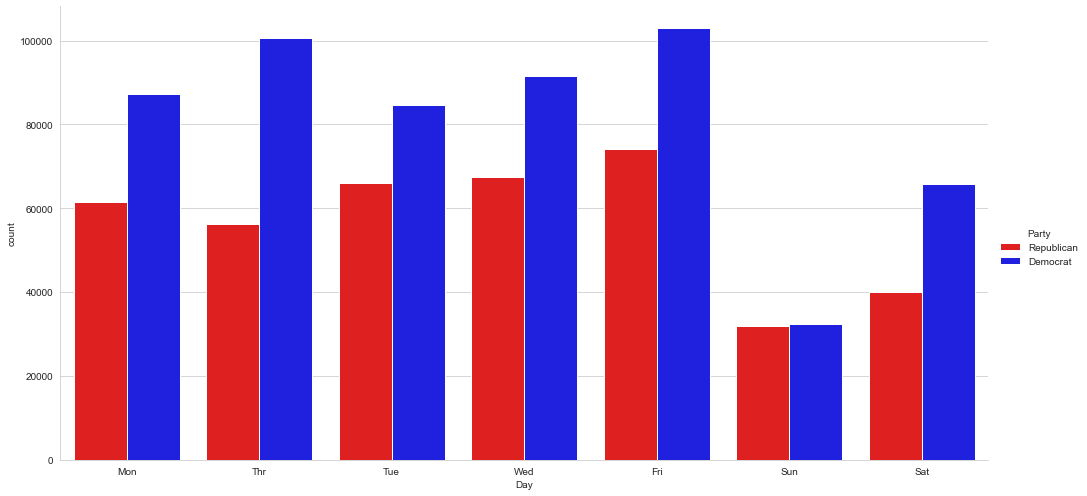

In [769]:
#### we will make the best out of date

sns.catplot(x='Day',data=donor_df,kind='count',hue='Party',height=7,aspect=2,palette={'Republican':'red',
                                                                                      'Democrat':'blue'})


#### seems like the support for democrat was higher no matter the day of the week except Sunday which was evenly split, interesting

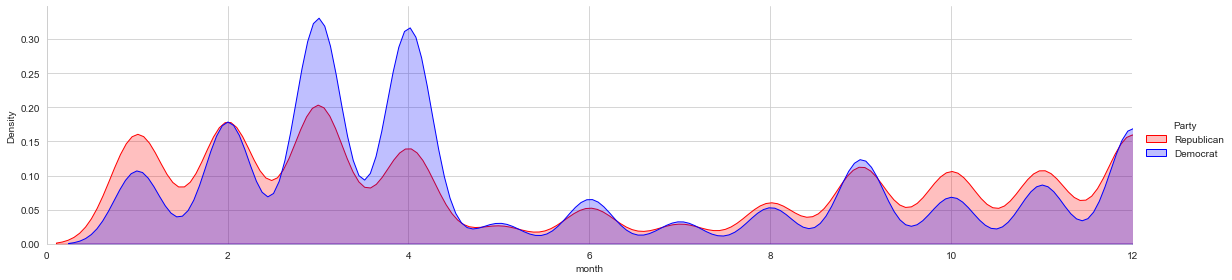

In [770]:
pl = sns.FacetGrid(donor_df,hue='Party',aspect=4,height=4,palette={'Republican':'red',
                                                                   'Democrat':'blue'})

pl.map(sns.kdeplot,'month',fill=True)

pl.set(xlim=(0,donor_df.month.max()))

pl.add_legend()


#### interesting we have a big spike in donation towards democrats on month 3 and 4

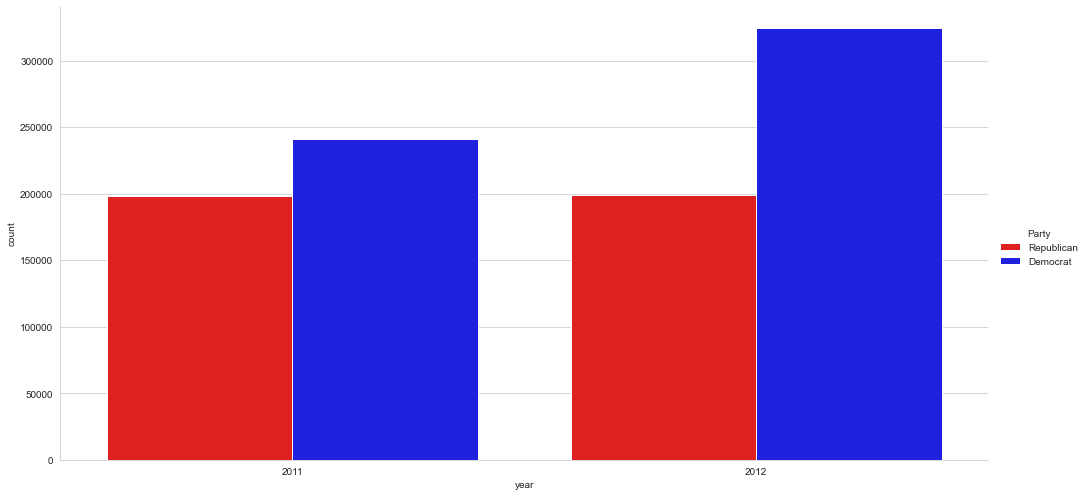

In [771]:
sns.catplot(x='year',data=donor_df,kind='count',hue='Party',height=7,aspect=2,palette={'Republican':'red',
                                                                                       'Democrat':'blue'})

#### definately we see a massive peak for support for democrats in 2012 compared to 2011

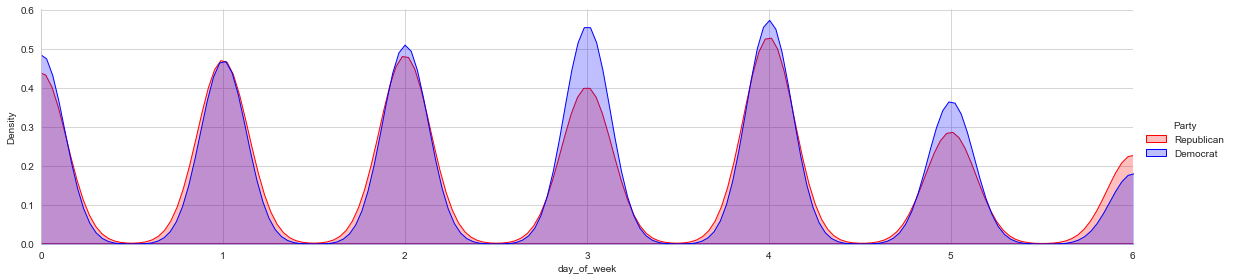

In [772]:
pl = sns.FacetGrid(donor_df,hue='Party',aspect=4,height=4,palette={'Republican':'red',
                                                                   'Democrat':'blue'})

pl.map(sns.kdeplot,'day_of_week',fill=True)

pl.set(xlim=(0,donor_df.day_of_week.max()))

pl.add_legend()


#### interesting

In [773]:
donor_df.month_name.unique()

array(['Jun', 'Jul', 'Aug', 'Oct', 'Jan', 'Sep', 'Nov', 'Dec', 'Feb',
       'Apr', 'Mar', 'May'], dtype=object)

In [774]:
donor_df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166,Republican,2011-06-23,6,Jun,3,Thr,2011
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073,Republican,2011-07-05,7,Jul,1,Tue,2011
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073,Republican,2011-08-01,8,Aug,0,Mon,2011
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011


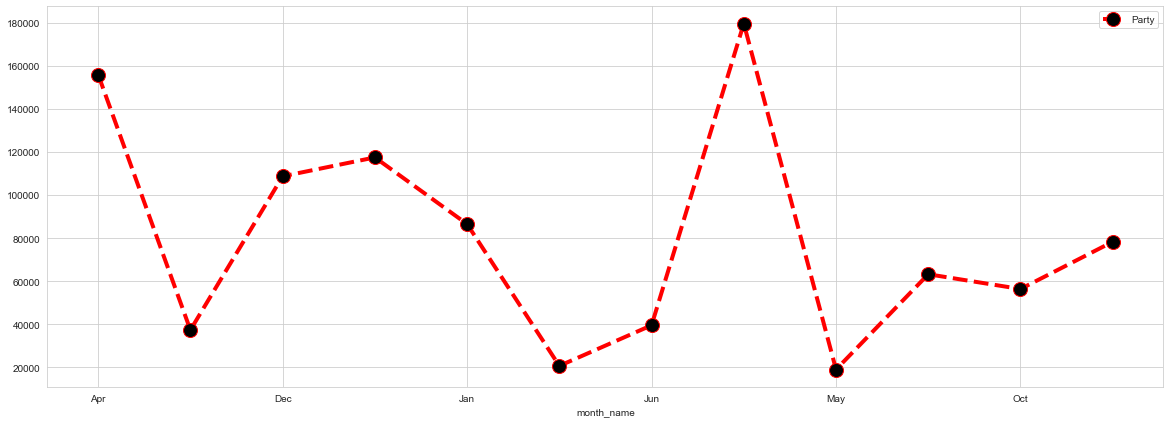

In [775]:
donor_df.groupby('month_name')['Party'].count().plot(legend=True,figsize=(20,7),marker='o',markersize=14,markerfacecolor='black',linestyle='dashed',linewidth=4,color='red')

#### month july is the most donated month of the year

In [776]:
heat = donor_df.groupby(['month_name','Day','Party'])['contb_receipt_amt'].sum().unstack().unstack()

heat

#### this gives us the most holistic view of which days and month related to which party

Party         Democrat                                                  \
Day                Fri         Mon         Sat         Sun         Thr   
month_name                                                               
Apr         3288933.77  6668568.40  1262737.10  1065682.09  3267748.63   
Aug          647720.94   849311.59    68726.04   110690.30   987093.16   
Dec         2528843.04  1112563.65  3713774.78   235820.59  2151210.31   
Feb         2285257.76  1723841.95   736513.09   523511.74  1787578.96   
Jan          950229.46  1064688.59   440997.27   369506.46  1305783.43   
Jul          685435.69   485842.75   124322.00    91325.00   625459.94   
Jun         1091520.61  1310773.90   332667.99   361280.12  3690816.25   
Mar         3657017.51  2086285.04  4742659.47   839106.45  3154461.74   
May          946689.12  1059390.12   203298.00   242959.00   847247.00   
Nov          454872.85  1059100.71   234170.08   220275.25   417139.38   
Oct         1028124.63  1154466.04   355621.50   277517.36   907854.09   
Sep         4590728.81  1449748.76   433590.84   335141.62  2184880.24   

Party                               Republican                          \
Day                Tue         Wed         Fri         Mon         Sat   
month_name                                                               
Apr         2980114.12  2490932.59  2629554.74  3427974.25   371005.07   
Aug          661950.17   912864.99  2081896.32  2241180.28   902219.09   
Dec         1331097.83  1471725.61  4958032.43  3182564.01  1693961.05   
Feb         2162778.26  5106373.33  2457024.41  2486026.73   490728.97   
Jan         2315677.43   945610.49  1635168.49  2016319.03  1276049.99   
Jul          484126.72   549791.41   825573.33   614307.95   119322.98   
Jun         1347477.31  2059463.70  1433496.52  2317744.81   225617.36   
Mar         2563497.61  2429692.41  2922958.82  2735842.82  2421677.56   
May         1158104.02   931911.33  1491883.74  3449882.71   187844.92   
Nov         1064004.55  1197720.38  2269173.68  3363891.26   465997.72   
Oct          669075.01   643193.01  1867542.42  2655996.95   602669.44   
Sep         2141450.33  2116947.60  9167166.29  1969621.12   642552.63   

Party                                                       
Day                Sun         Thr         Tue         Wed  
month_name                                                  
Apr          937160.10  2530349.29  3115707.84  2424961.37  
Aug          442611.96  1506355.05  2313680.54  2295595.22  
Dec          458091.53  2665102.85  2911473.26  3694840.11  
Feb          480445.67  2676749.76  3550451.99  5955282.17  
Jan         1085736.23  2191564.66  2913886.72  2425447.46  
Jul          114028.94   741708.64  1264510.33  1039767.97  
Jun          691897.47  4110015.90  2410141.31  3334528.09  
Mar          587843.90  2465155.16  3058128.47  2905167.69  
May          294341.27  1350156.01  2001406.85  1049388.77  
Nov          409670.57  1069920.40  3243776.30  2935418.43  
Oct          415080.74  1889360.05  1704546.80  2659671.36  
Sep          442348.62  4879756.07  2492463.42  2945322.71

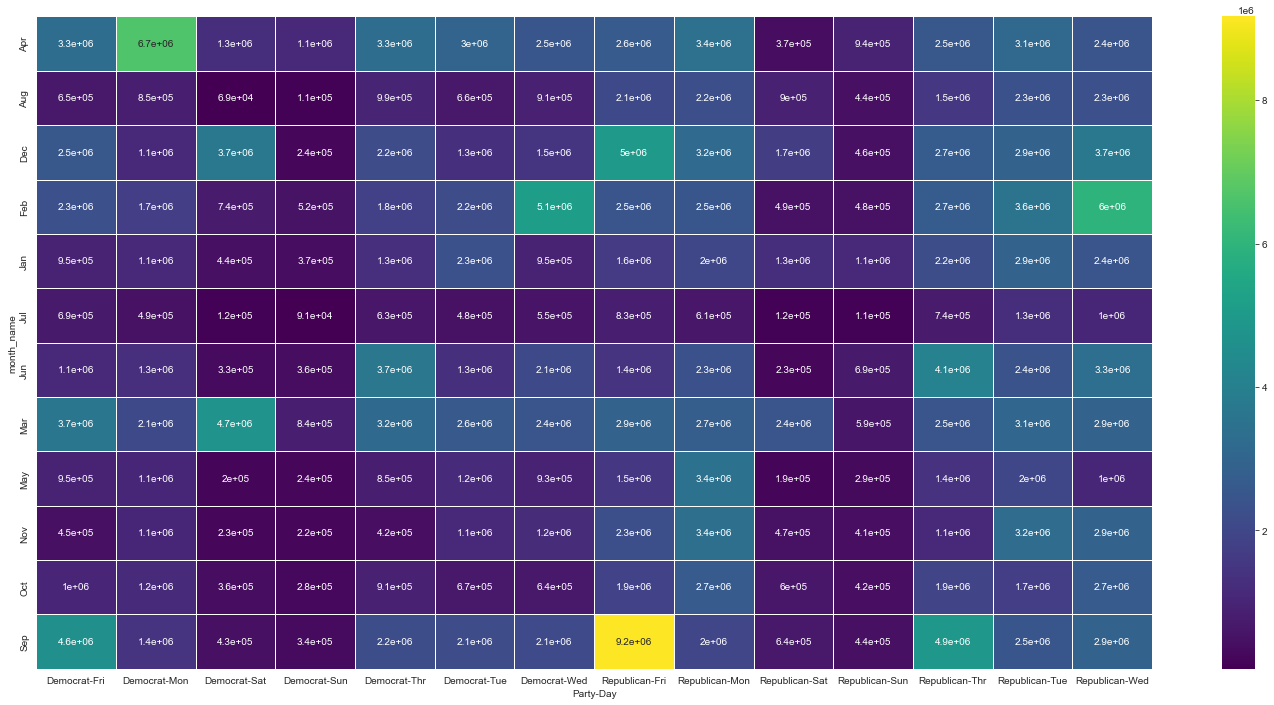

In [777]:
fig, ax = plt.subplots(figsize=(25,12))

sns.heatmap(heat,ax=ax,linewidths=0.5,annot=True,cmap='viridis')

#### seems like for democrats their best day was on Monday of April while for Republicans it was Friday September

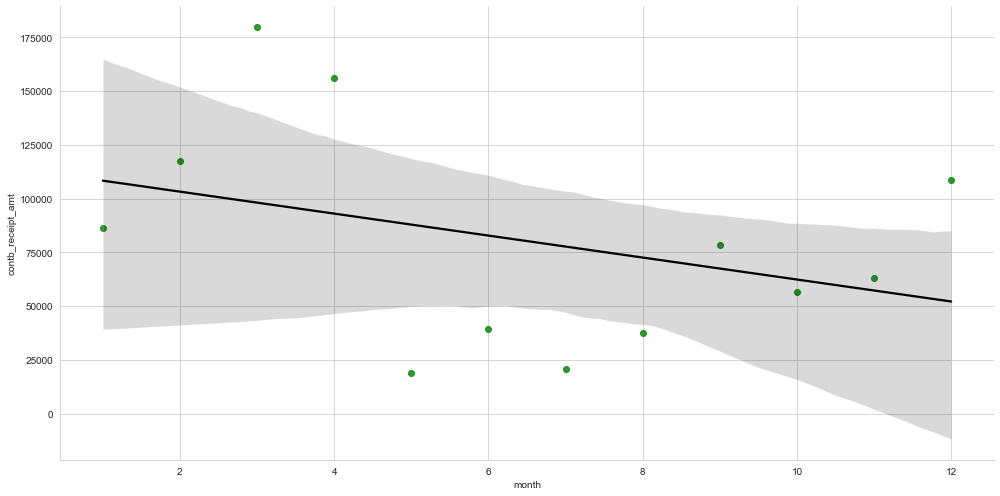

In [778]:
sns.lmplot(x='month',y='contb_receipt_amt',data=donor_df.groupby('month').count().reset_index(),height=7,aspect=2,line_kws={'color':'black'},scatter_kws={'color':'green'})


#### quite interesting

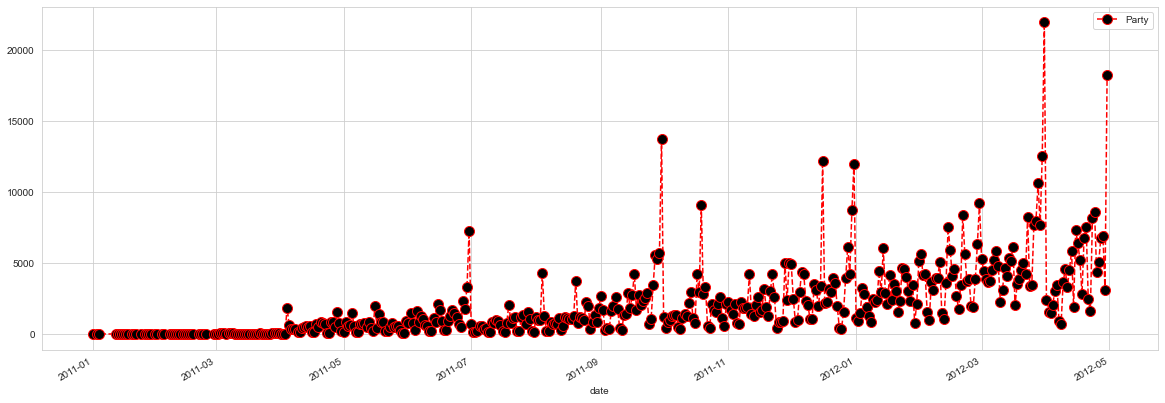

In [779]:
donor_df.groupby('date').count()['Party'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='black',markersize=10,linestyle='dashed',color='red')

#### definately we see the major spike at the end of election which doesn't suprise us at all

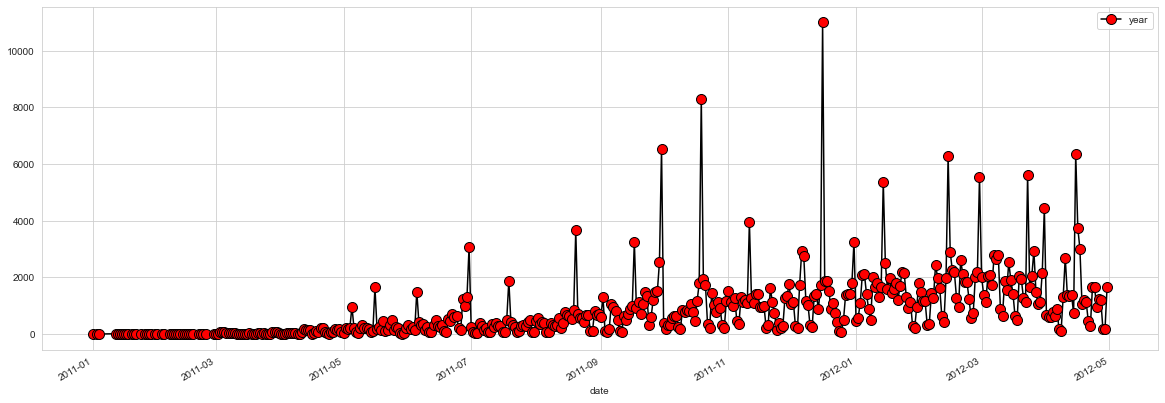

In [780]:
donor_df[donor_df.Party == 'Republican'].groupby('date').count()['year'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='red',color='black',markersize=10)


#### this is Republican graph as we see their major spike is at around 01-2012

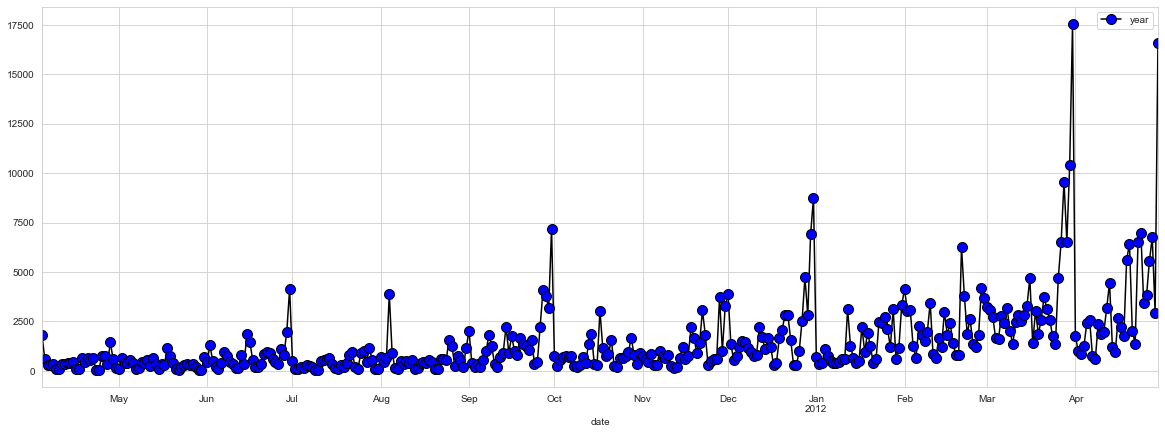

In [781]:
donor_df[donor_df.Party == 'Democrat'].groupby('date').count()['year'].plot(legend=True,figsize=(20,7),marker='o',markerfacecolor='blue',color='black',markersize=10)

#### we see democrats biggest spike in April of 2012

In [782]:
heat_2 = donor_df.groupby(by=['month_name','Day','year','Party'])['contb_receipt_amt'].sum().unstack().unstack().fillna(0)

heat_2

Party             Democrat              Republican            
year                  2011        2012        2011        2012
month_name Day                                                
Apr        Fri  1040582.45  2248351.32   634785.20  1994769.54
           Mon  1573869.49  5094698.91   380530.00  3047444.25
           Sat   250862.00  1011875.10    81524.80   289480.27
           Sun   147325.00   918357.09    82825.00   854335.10
           Thr  1307540.86  1960207.77   791771.40  1738577.89
...                    ...         ...         ...         ...
Sep        Sat   433590.84        0.00   642552.63        0.00
           Sun   335141.62        0.00   442348.62        0.00
           Thr  2184880.24        0.00  4879756.07        0.00
           Tue  2141450.33        0.00  2492463.42        0.00
           Wed  2116947.60        0.00  2945322.71        0.00

[84 rows x 4 columns]

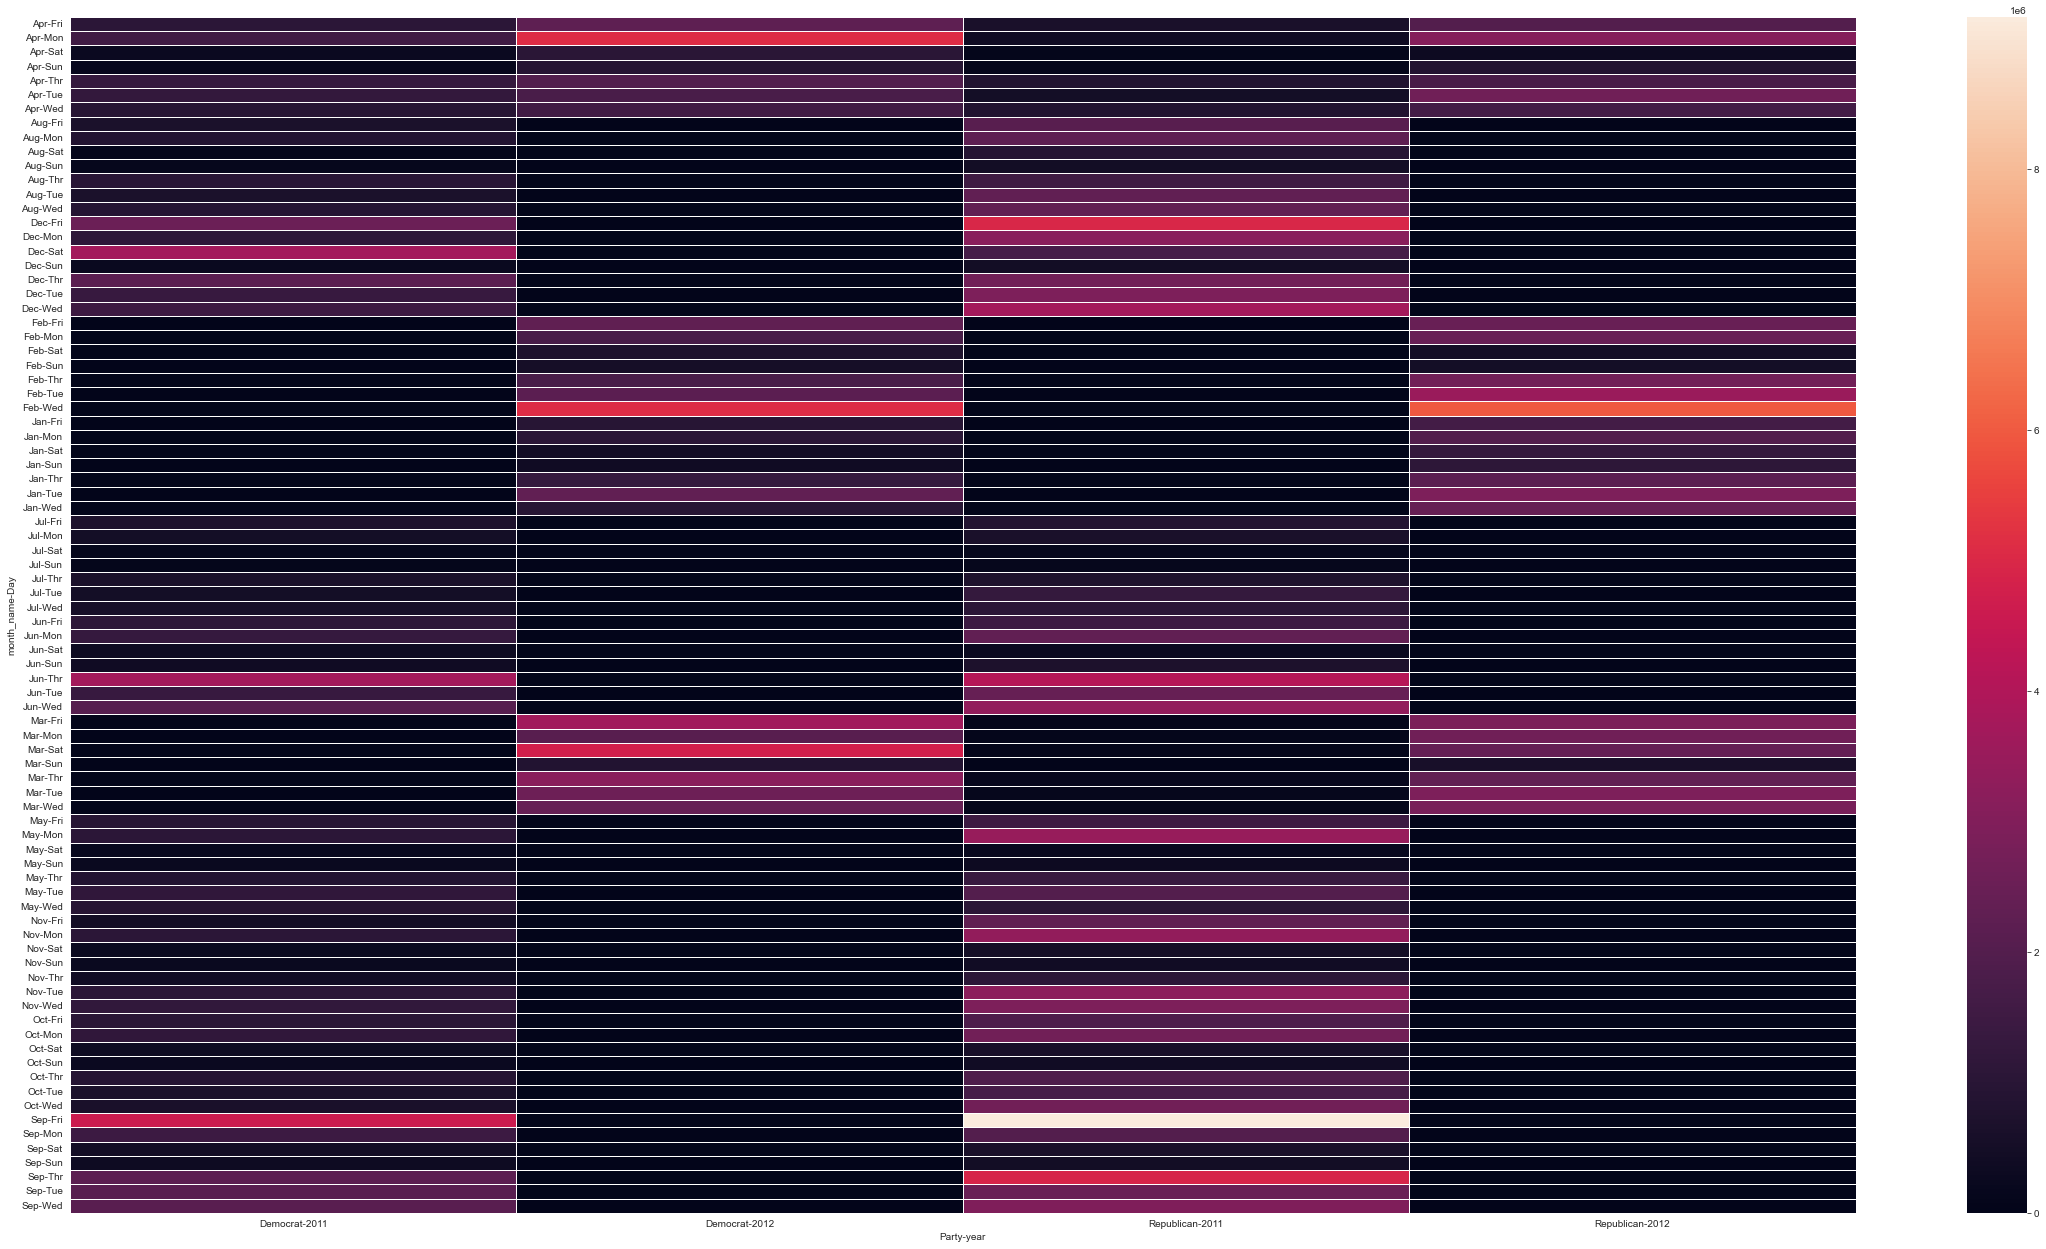

In [783]:
fig, ax = plt.subplots(figsize=(40,22))

sns.heatmap(heat_2,ax=ax,linewidths=0.5)


#### from this we can draw a lot of insights

In [784]:
heat_2 = donor_df.groupby(by=['month_name','year','Party'])['contb_receipt_amt'].sum().unstack().unstack().fillna(0)

heat_2

Party          Democrat                Republican             
year               2011         2012         2011         2012
month_name                                                    
Apr          6487619.79  14537096.91   3262304.81  12174407.85
Aug          4238357.19         0.00  11783538.46         0.00
Dec         12545035.81         0.00  19564065.24         0.00
Feb                0.00  14325855.09     40035.00  18056674.70
Jan                0.00   7392493.13     55100.00  13489072.58
Jul          3046303.51         0.00   4719220.14         0.00
Jun         10193999.88         0.00  14523441.46         0.00
Mar                0.00  19472720.23    558400.00  16538374.42
May          5389598.59         0.00   9824904.27         0.00
Nov          4647283.20         0.00  13757848.36         0.00
Oct          5035851.64         0.00  11794867.76         0.00
Sep         13252488.20         0.00  22539230.86         0.00

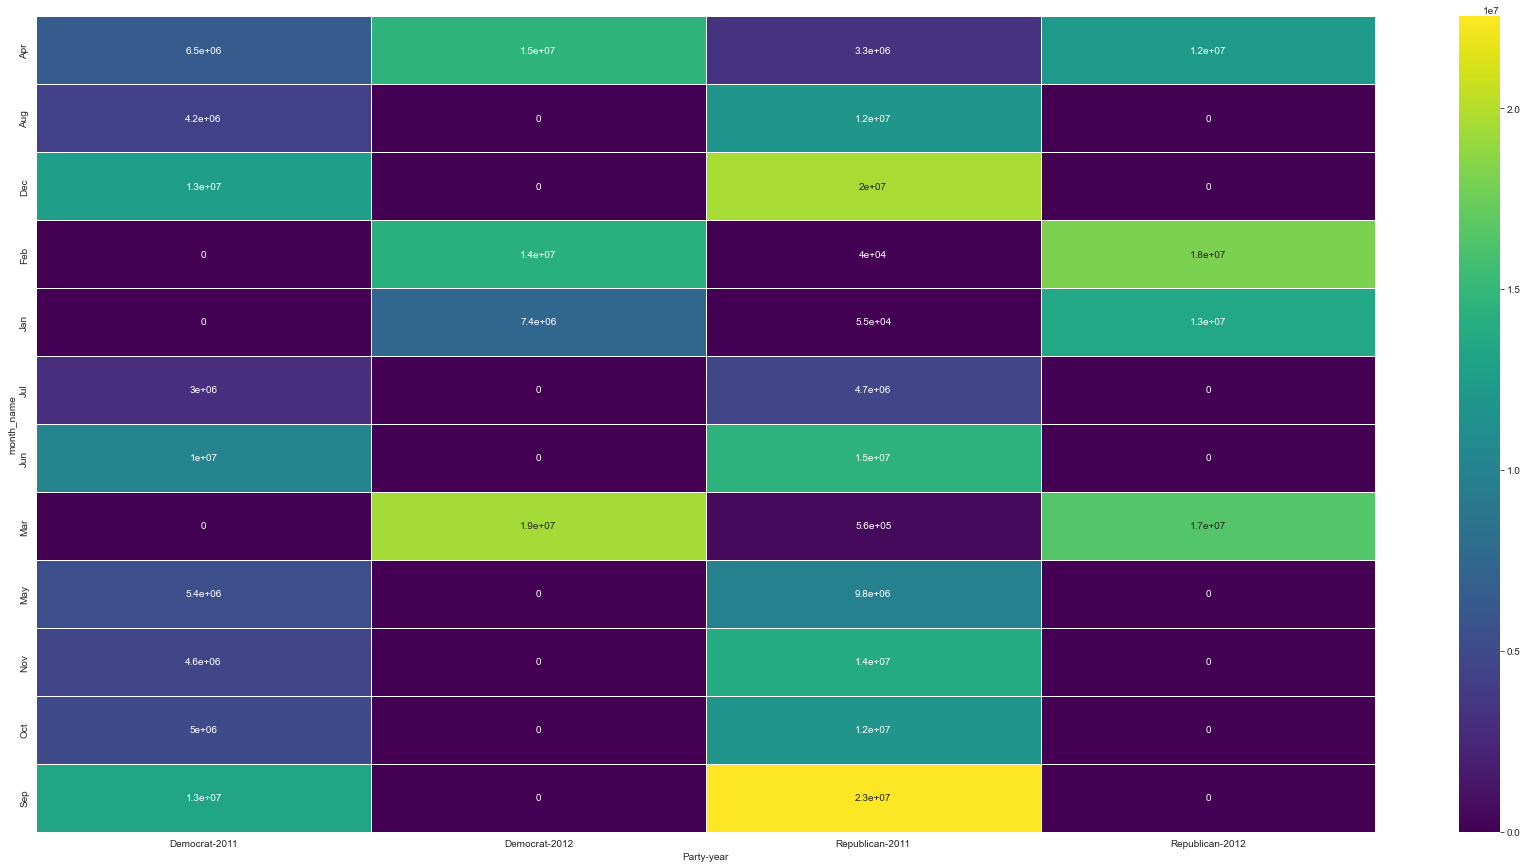

In [785]:
fig, ax = plt.subplots(figsize=(30,15))

sns.heatmap(heat_2,ax=ax,linewidths=0.5,cmap='viridis',annot=True)

plt.savefig('Donor_month_year_party_heatmap.jpeg', dpi=300, bbox_inches='tight')

#### here we only seeing the month year and party heatmap

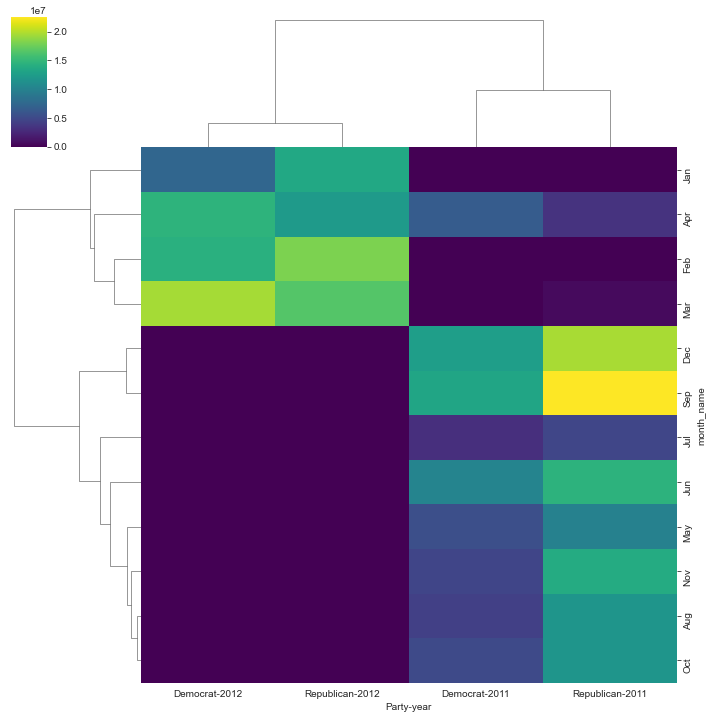

In [786]:
sns.clustermap(heat_2,cmap='viridis')

#### cluster map for better understanding

In [500]:
################################################################################
######## Part VII - Model - Classification
################################################################################


In [501]:
donor_df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166,Republican,2011-06-23,6,Jun,3,Thr,2011
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073,Republican,2011-07-05,7,Jul,1,Tue,2011
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073,Republican,2011-08-01,8,Aug,0,Mon,2011
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011


In [504]:
X = donor_df.drop(columns=['cand_nm','contbr_nm','contb_receipt_dt','form_tp','Party','file_num','contbr_zip','date','month_name','Day'])

In [505]:
X.head()

,contbr_city,contbr_st,contbr_employer,contbr_occupation,contb_receipt_amt,month,day_of_week,year
0,MOBILE,AL,RETIRED,RETIRED,250.0,6,0,2011
1,MOBILE,AL,RETIRED,RETIRED,50.0,6,3,2011
2,LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,7,1,2011
3,PIGGOTT,AR,NONE,RETIRED,250.0,8,0,2011
4,HOT SPRINGS NATION,AR,NONE,RETIRED,300.0,6,0,2011


In [506]:
X.contbr_occupation.nunique()

45061

In [507]:
y = donor_df.Party

In [508]:
y.head()

0    Republican
1    Republican
2    Republican
3    Republican
4    Republican
Name: Party, dtype: object

In [195]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [510]:
preprocessor = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), ['contbr_city','contbr_st','contbr_employer','contbr_occupation']),
                                               ('num', StandardScaler(),['contb_receipt_amt','month','day_of_week','year'])
                                              ]
                                )



In [196]:
from sklearn.pipeline import Pipeline

In [512]:
from sklearn.linear_model import LogisticRegression


In [519]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=2000))
])


In [197]:
from sklearn.model_selection import train_test_split


In [521]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)


In [522]:
%%time

model.fit(X_train,y_train)

Wall time: 3min 35s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['contbr_city', 'contbr_st',
                                                   'contbr_employer',
                                                   'contbr_occupation']),
                                                 ('num', StandardScaler(),
                                                  ['contb_receipt_amt', 'month',
                                                   'day_of_week', 'year'])])),
                ('classifier', LogisticRegression(max_iter=2000))])

In [523]:
y_predict = model.predict(X_test)

In [198]:
from sklearn import metrics


In [525]:
metrics.accuracy_score(y_test,y_predict)                        #### amazing result wasnt expecting this

0.8525845498467453

In [526]:
print(metrics.classification_report(y_test,y_predict))          #### honestly suprised with this metrics, was expecting much lower then this but I will take this without complains

              precision    recall  f1-score   support

    Democrat       0.85      0.92      0.88    169797
  Republican       0.86      0.76      0.81    118938

    accuracy                           0.85    288735
   macro avg       0.86      0.84      0.84    288735
weighted avg       0.85      0.85      0.85    288735



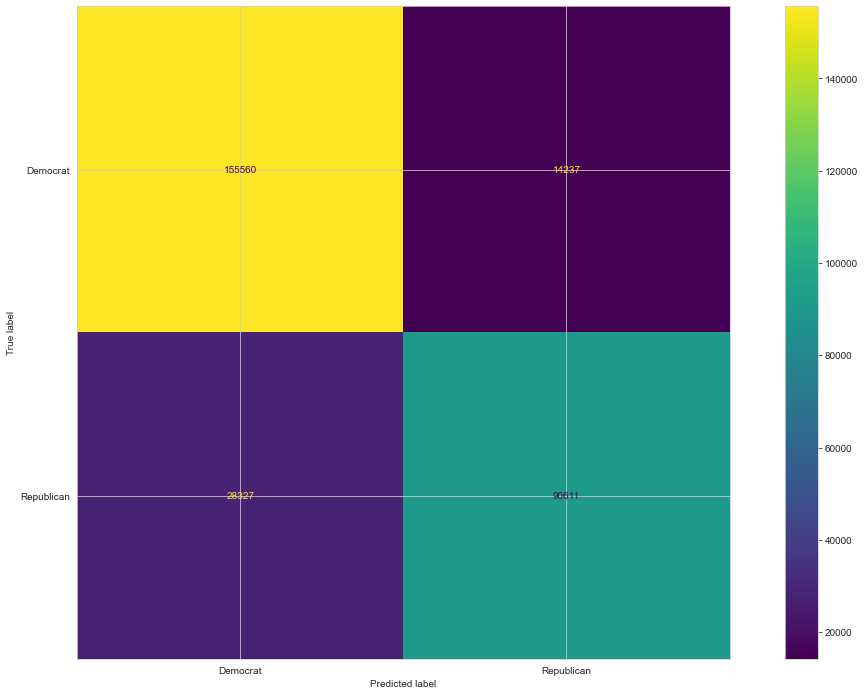

In [527]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Democrat','Republican']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(20,12))

disp.plot(ax=ax)

plt.savefig('Election_2012_confusion_matrix.jpeg', dpi=300, bbox_inches='tight')


In [528]:
y.unique()

array(['Republican', 'Democrat'], dtype=object)

In [529]:
from sklearn.ensemble import RandomForestClassifier                #### using random forest to see if we can get better result

In [530]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_jobs=-1))
])

In [531]:
%%time

model.fit(X_train,y_train)

Wall time: 4h 24min 37s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['contbr_city', 'contbr_st',
                                                   'contbr_employer',
                                                   'contbr_occupation']),
                                                 ('num', StandardScaler(),
                                                  ['contb_receipt_amt', 'month',
                                                   'day_of_week', 'year'])])),
                ('classifier', RandomForestClassifier(n_jobs=-1))])

In [532]:
y_predict = model.predict(X_test)

In [533]:
print(metrics.classification_report(y_test,y_predict))              #### much better then previous model

              precision    recall  f1-score   support

    Democrat       0.88      0.93      0.90    169797
  Republican       0.89      0.82      0.85    118938

    accuracy                           0.88    288735
   macro avg       0.88      0.87      0.88    288735
weighted avg       0.88      0.88      0.88    288735



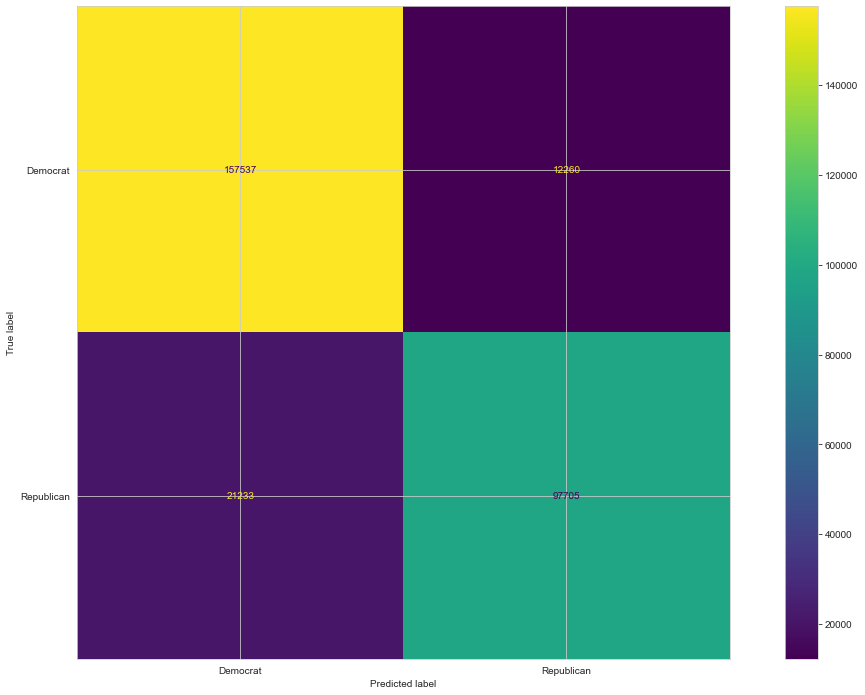

In [534]:
cm = metrics.confusion_matrix(y_test,y_predict)

labels = ['Democrat','Republican']

disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)

fig, ax = plt.subplots(figsize=(20,12))

disp.plot(ax=ax)

plt.savefig('Election_2012_confusion_matrix_random_forest.jpeg', dpi=300, bbox_inches='tight')



In [535]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [536]:
import xgboost as xgb

In [537]:
clf_xgb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
])

param_grid_xgb = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 5, 7],
    'classifier__learning_rate': [0.01, 0.05, 0.1],
    'classifier__subsample': [0.7, 0.8, 0.9],
    'classifier__colsample_bytree': [0.7, 0.8, 0.9]
}


In [538]:
from sklearn.model_selection import RandomizedSearchCV            #### this one is giving us error due to y not being 0 and 1

In [539]:
donor_df['Parties'] = donor_df.Party.map({'Republican':0,
                                          'Democrat':1})

In [540]:
y = donor_df['Parties']

y.head()

0    0
1    0
2    0
3    0
4    0
Name: Parties, dtype: int64

In [541]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [544]:
%%time

random_search_xgb = RandomizedSearchCV(clf_xgb, param_grid_xgb, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search_xgb.fit(X_train, y_train)


Wall time: 6h 24min 58s


In [545]:
best_model = random_search_xgb.best_estimator_

In [546]:
y_predict = best_model.predict(X_test)

In [547]:
print(metrics.classification_report(y_test,y_predict))              #### honestly not the best model

              precision    recall  f1-score   support

           0       0.82      0.67      0.74    118938
           1       0.80      0.90      0.84    169797

    accuracy                           0.80    288735
   macro avg       0.81      0.78      0.79    288735
weighted avg       0.81      0.80      0.80    288735



In [548]:
############################################################################################################################
#### Due to the extensive size of the dataset and the limited computing power available, running model fits has been #######
#### taking more than four hours. Although there is potential to further improve the results with advanced methods, ########
#### our current computational resources restrict us from doing so. The best accuracy achieved so far is 0.90 using a ###### 
#### Random Forest classifier. Consequently, we have decided to halt further classification efforts at this point. #########
############################################################################################################################


In [463]:
###################################################################################
##### Part VIII - Model - Regression
###################################################################################


In [787]:
donor_df.head()                          #### our target is amount in dollars donated
                                         #### note we know this dataset is not suitable for regression model especially on amount donated but we will give it a shot

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166,Republican,2011-06-23,6,Jun,3,Thr,2011
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073,Republican,2011-07-05,7,Jul,1,Tue,2011
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073,Republican,2011-08-01,8,Aug,0,Mon,2011
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011


In [788]:
mean_df = donor_df.contb_receipt_amt.mean()
std_df = donor_df.contb_receipt_amt.std()

print(mean_df,std_df)                             #### this is just horrible, look at std which means high value outliers 

304.687826334435 3816.7695844609084


In [789]:
from scipy.stats import norm

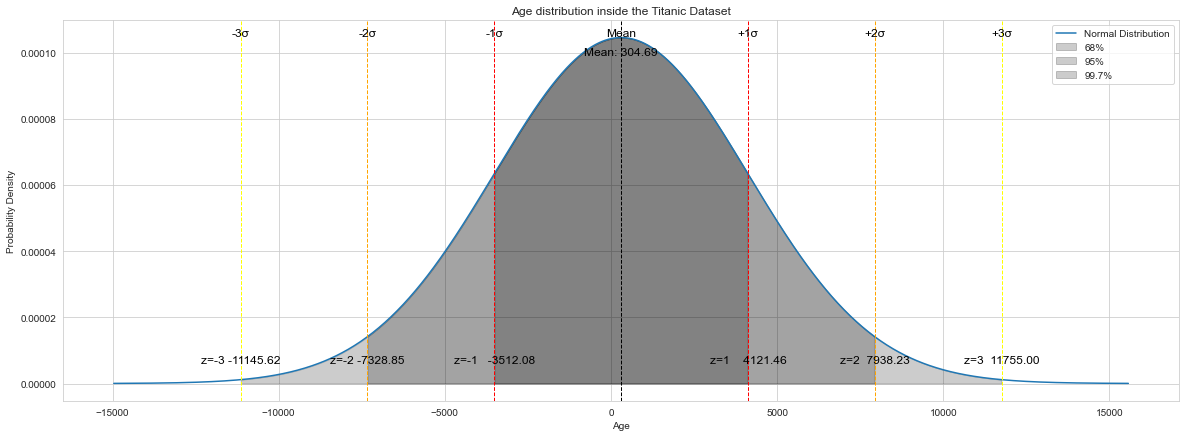

In [790]:
#### Comprehensive time

x = np.linspace(mean_df - 4*std_df, mean_df + 4*std_df, 1000)
y = norm.pdf(x, mean_df, std_df)

#### plot
plt.figure(figsize=(20, 7))

#### normal distribution curve
plt.plot(x, y, label='Normal Distribution')

#### areas under the curve
plt.fill_between(x, y, where=(x >= mean_df - std_df) & (x <= mean_df + std_df), color='black', alpha=0.2, label='68%')
plt.fill_between(x, y, where=(x >= mean_df - 2*std_df) & (x <= mean_df + 2*std_df), color='black', alpha=0.2, label='95%')
plt.fill_between(x, y, where=(x >= mean_df - 3*std_df) & (x <= mean_df + 3*std_df), color='black', alpha=0.2, label='99.7%')

#### mean and standard deviations
plt.axvline(mean_df, color='black', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + std_df, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 2*std_df, color='orange', linestyle='dashed', linewidth=1)
plt.axvline(mean_df - 3*std_df, color='yellow', linestyle='dashed', linewidth=1)
plt.axvline(mean_df + 3*std_df, color='yellow', linestyle='dashed', linewidth=1)

plt.text(mean_df, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, plt.gca().get_ylim()[1]*0.05, f'z=1    {mean_df + std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, plt.gca().get_ylim()[1]*0.05, f'z=-1   {mean_df - std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=2  {mean_df + 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-2 {mean_df - 2*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=3  {mean_df + 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, plt.gca().get_ylim()[1]*0.05, f'z=-3 {mean_df - 3*std_df:.2f}', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')


#### annotate the plot
plt.text(mean_df, max(y), 'Mean', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - std_df, max(y), '-1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + std_df, max(y), '+1σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 2*std_df, max(y), '-2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 2*std_df, max(y), '+2σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df - 3*std_df, max(y), '-3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')
plt.text(mean_df + 3*std_df, max(y), '+3σ', horizontalalignment='center', fontsize=12, verticalalignment='bottom', color='black')

#### labels
plt.title('Age distribution inside the Titanic Dataset')
plt.xlabel('Age')
plt.ylabel('Probability Density')

plt.legend()


#### the majority is mean which is 304 but z-score level 1 is 4121, so we can do one interesting thing, exclude anybody above that

In [791]:
df = donor_df[donor_df.contb_receipt_amt < 4121].copy()

In [792]:
df.count()

cand_nm              960695
contbr_nm            960695
contbr_city          960695
contbr_st            960695
contbr_zip           960695
contbr_employer      960695
contbr_occupation    960695
contb_receipt_amt    960695
contb_receipt_dt     960695
form_tp              960695
file_num             960695
Party                960695
date                 960695
month                960695
month_name           960695
day_of_week          960695
Day                  960695
year                 960695
dtype: int64

In [793]:
df[df.contb_receipt_amt<0]              #### nobody below 0

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year


In [794]:
df[df.contb_receipt_amt<1]              #### nobody less then 1

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year


In [795]:
df.contb_receipt_amt.mean()

286.96116371993605

In [796]:
df.contb_receipt_amt.std()                  #### still not ideal but we will take it 

557.1274740833255

In [797]:
df.head()

,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,form_tp,file_num,Party,date,month,month_name,day_of_week,Day,year
0,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011
1,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,SA17A,736166,Republican,2011-06-23,6,Jun,3,Thr,2011
2,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,SA17A,749073,Republican,2011-07-05,7,Jul,1,Tue,2011
3,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,SA17A,749073,Republican,2011-08-01,8,Aug,0,Mon,2011
4,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,SA17A,736166,Republican,2011-06-20,6,Jun,0,Mon,2011


In [798]:
X = df.drop(columns=['cand_nm','contbr_nm','contbr_zip','contb_receipt_amt','contb_receipt_dt','form_tp','file_num','month_name','Day'])

In [799]:
X.head()

,contbr_city,contbr_st,contbr_employer,contbr_occupation,Party,date,month,day_of_week,year
0,MOBILE,AL,RETIRED,RETIRED,Republican,2011-06-20,6,0,2011
1,MOBILE,AL,RETIRED,RETIRED,Republican,2011-06-23,6,3,2011
2,LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,Republican,2011-07-05,7,1,2011
3,PIGGOTT,AR,NONE,RETIRED,Republican,2011-08-01,8,0,2011
4,HOT SPRINGS NATION,AR,NONE,RETIRED,Republican,2011-06-20,6,0,2011


In [800]:
X['day'] = X.date.apply(lambda x:x.day)

X.day.head()

0    20
1    23
2     5
3     1
4    20
Name: day, dtype: int64

In [801]:
X.drop(columns=['date','day_of_week'],inplace=True)

X.head()

,contbr_city,contbr_st,contbr_employer,contbr_occupation,Party,month,year,day
0,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,20
1,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,23
2,LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,Republican,7,2011,5
3,PIGGOTT,AR,NONE,RETIRED,Republican,8,2011,1
4,HOT SPRINGS NATION,AR,NONE,RETIRED,Republican,6,2011,20


In [802]:
X.isnull().any()

contbr_city          False
contbr_st            False
contbr_employer      False
contbr_occupation    False
Party                False
month                False
year                 False
day                  False
dtype: bool

In [803]:
y = df['contb_receipt_amt']

y.head()

0    250.0
1     50.0
2    250.0
3    250.0
4    300.0
Name: contb_receipt_amt, dtype: float64

In [804]:
y.isnull().any()

False

In [805]:
X.head()

,contbr_city,contbr_st,contbr_employer,contbr_occupation,Party,month,year,day
0,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,20
1,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,23
2,LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,Republican,7,2011,5
3,PIGGOTT,AR,NONE,RETIRED,Republican,8,2011,1
4,HOT SPRINGS NATION,AR,NONE,RETIRED,Republican,6,2011,20


In [806]:
from sklearn.linear_model import LinearRegression
from category_encoders import TargetEncoder


In [807]:
preprocessor = ColumnTransformer(transformers=[
                                               ('cat', TargetEncoder(), ['contbr_city','contbr_st','contbr_employer','contbr_occupation','Party']),
                                               ('num', StandardScaler(),['month','day','year'])

                                              ]
                                )


In [808]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [809]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))
                       ])


In [810]:
%%time

model.fit(X_train, y_train)

Wall time: 5.72 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', TargetEncoder(),
                                                  ['contbr_city', 'contbr_st',
                                                   'contbr_employer',
                                                   'contbr_occupation',
                                                   'Party']),
                                                 ('num', StandardScaler(),
                                                  ['month', 'day', 'year'])])),
                ('regressor', LinearRegression(n_jobs=-1))])

In [811]:
y_predict = model.predict(X_test)

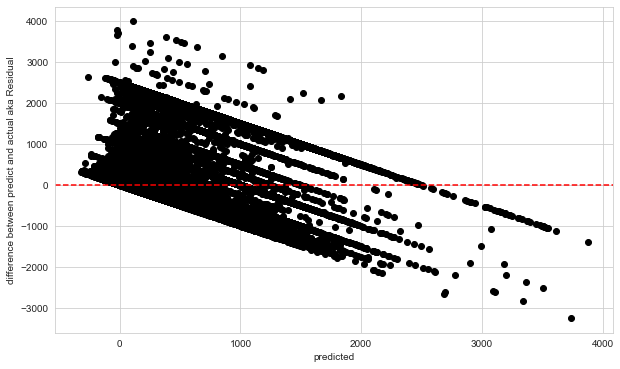

In [812]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly


In [813]:
metrics.r2_score(y_test,y_predict)

0.225940052782157

In [814]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### not a good fit obviously

489.47422563302075

In [815]:
from sklearn.linear_model import Ridge


In [816]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', Ridge(alpha=1.0))
                       ])


In [817]:
X.head()

,contbr_city,contbr_st,contbr_employer,contbr_occupation,Party,month,year,day
0,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,20
1,MOBILE,AL,RETIRED,RETIRED,Republican,6,2011,23
2,LANETT,AL,INFORMATION REQUESTED,INFORMATION REQUESTED,Republican,7,2011,5
3,PIGGOTT,AR,NONE,RETIRED,Republican,8,2011,1
4,HOT SPRINGS NATION,AR,NONE,RETIRED,Republican,6,2011,20


In [818]:
%%time

model.fit(X_train,y_train)

Wall time: 5.94 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat', TargetEncoder(),
                                                  ['contbr_city', 'contbr_st',
                                                   'contbr_employer',
                                                   'contbr_occupation',
                                                   'Party']),
                                                 ('num', StandardScaler(),
                                                  ['month', 'day', 'year'])])),
                ('regressor', Ridge())])

In [819]:
y_predict = model.predict(X_test)

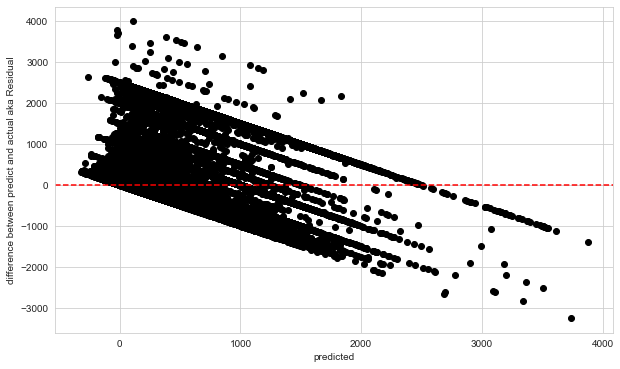

In [820]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### its making a pattern which is always bad

In [821]:
metrics.r2_score(y_test,y_predict)                      #### no improvement

0.22594000998712704

In [822]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

489.4742391636678

In [823]:
from sklearn.decomposition import PCA


In [824]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('scaler', StandardScaler()),
            ('pca', PCA(n_components='mle'))  
        ]), ['month','day','year']),
        ('cat', TargetEncoder(), ['contbr_city','contbr_st','contbr_employer','contbr_occupation','Party']),

    ])

#### lets see with PCA

In [825]:
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression(n_jobs=-1))
                       ])


In [826]:
%%time

model.fit(X_train, y_train)

Wall time: 5.62 s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('pca',
                                                                   PCA(n_components='mle'))]),
                                                  ['month', 'day', 'year']),
                                                 ('cat', TargetEncoder(),
                                                  ['contbr_city', 'contbr_st',
                                                   'contbr_employer',
                                                   'contbr_occupation',
                                                   'Party'])])),
                ('regressor', LinearRegression(n_jobs=-1))])

In [827]:
y_predict = model.predict(X_test)

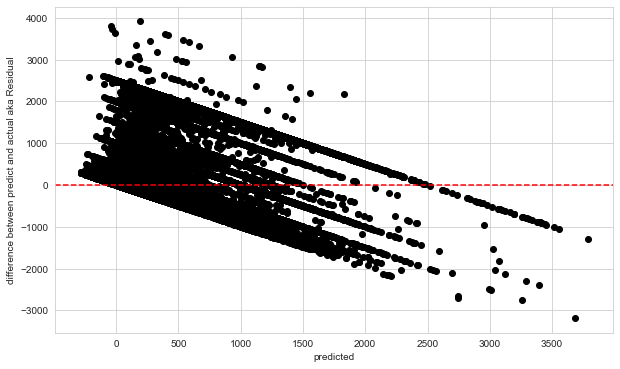

In [828]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [829]:
metrics.r2_score(y_test,y_predict)

0.20774763989866107

In [830]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### PCA didn't help either

495.1927763839878

In [831]:
from sklearn.ensemble import RandomForestRegressor


In [832]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_features='auto',n_estimators=100,n_jobs=-1))
])


In [833]:

param_grid = {
    'regressor__n_estimators': [50,100],
    'regressor__max_depth': [None, 10],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [1]
}


In [834]:
from sklearn.model_selection import GridSearchCV


In [835]:
grid_model = GridSearchCV(model, param_grid, cv=3, scoring='r2', verbose=2)


In [836]:
%%time

grid_model.fit(X_train, y_train)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time= 1.2min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time= 1.2min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=50; total time= 1.1min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time= 2.0min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time= 2.1min
[CV] END regressor__max_depth=None, regressor__min_samples_leaf=1, regressor__min_samples_split=2, regressor__n_estimators=100; total time= 2.6min
[CV] END regressor__max_depth=10, regressor__min_samples_leaf

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler()),
                                                                                         ('pca',
                                                                                          PCA(n_components='mle'))]),
                                                                         ['month',
                                                                          'day',
                                                                          'year']),
                                                                        ('cat',
                                                                         TargetEncoder(),
   

In [837]:
best_model = grid_model.best_estimator_

In [838]:
y_predict = best_model.predict(X_test)

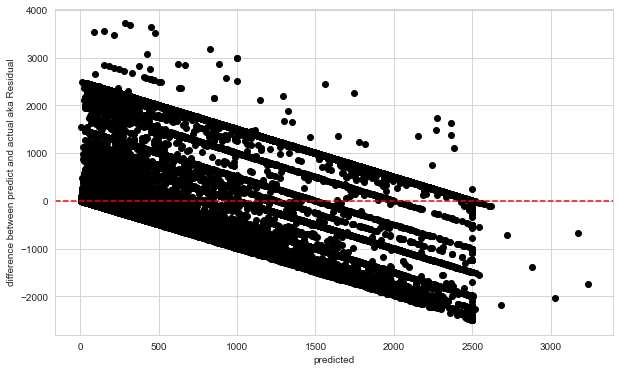

In [839]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [840]:
metrics.r2_score(y_test,y_predict)

0.28998800295976424

In [841]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### not helpful obviously

468.7867990223301

In [843]:
from sklearn.model_selection import RandomizedSearchCV


In [844]:
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}


In [845]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_features='auto',n_estimators=100,n_jobs=-1))
])


In [846]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [ ]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  52.0s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  52.5s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  53.0s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  49.2s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regres

In [535]:
best_model = random_search.best_estimator_

In [536]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

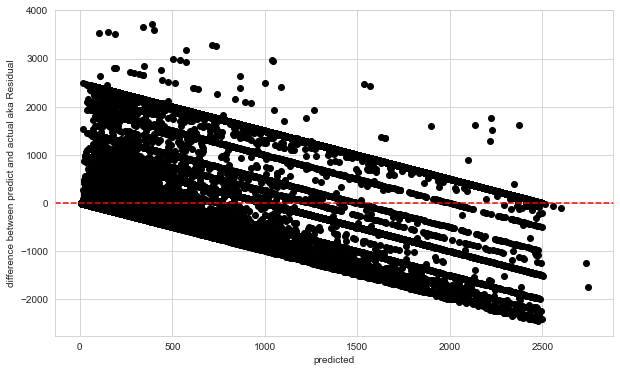

In [537]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')


In [538]:
metrics.r2_score(y_test,y_predict)

0.32286118561351707

In [539]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              #### this is the best we got so far

457.80589895121125

In [541]:
preprocessor = ColumnTransformer(transformers=[
                                               ('cat', TargetEncoder(), ['contbr_city','contbr_st','contbr_employer','contbr_occupation','Party']),
                                               ('num', StandardScaler(),['month','day','year'])

                                              ]
                                )


In [542]:
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_features': ['auto', 'sqrt'],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2],
    'regressor__bootstrap': [True, False]
}


In [543]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42,max_features='auto',n_estimators=100,n_jobs=-1))
])


In [544]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [545]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  51.1s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  48.6s
[CV] END regressor__bootstrap=False, regressor__max_depth=20, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=5, regressor__n_estimators=100; total time=  48.1s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regressor__min_samples_split=2, regressor__n_estimators=200; total time=  46.1s
[CV] END regressor__bootstrap=True, regressor__max_depth=10, regressor__max_features=sqrt, regressor__min_samples_leaf=2, regres

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               TargetEncoder(),
                                                                               ['contbr_city',
                                                                                'contbr_st',
                                                                                'contbr_employer',
                                                                                'contbr_occupation',
                                                                                'Party']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                     

In [546]:
best_model = random_search.best_estimator_

In [547]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

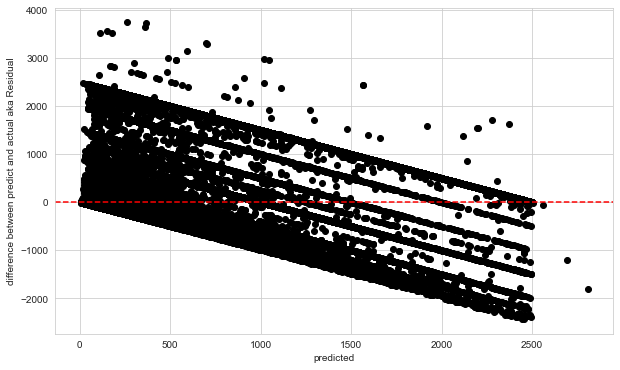

In [548]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly


In [549]:
metrics.r2_score(y_test,y_predict)                                      

0.32071300436681915

In [550]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))              

458.5315044525913

In [553]:
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [3, 6, 9],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__subsample': [0.6, 0.8, 1.0],
    'regressor__colsample_bytree': [0.6, 0.8, 1.0]
}


In [555]:
import xgboost as xgb


In [560]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', xgb.XGBRegressor(objective='reg:squarederror', random_state=42,n_jobs=-1))
])


In [561]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [562]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=500, regressor__subsample=0.6; total time= 4.3min
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=500, regressor__subsample=0.6; total time= 4.3min
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__max_depth=9, regressor__n_estimators=500, regressor__subsample=0.6; total time= 4.4min
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=500, regressor__subsample=0.6; total time= 2.1min
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__max_depth=3, regressor__n_estimators=500, regressor__subsample=0.6; total time= 2.1min
[CV] END regressor__colsample_bytree=0.6, regressor__learning_rate=0.01, regressor__

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               TargetEncoder(),
                                                                               ['contbr_city',
                                                                                'contbr_st',
                                                                                'contbr_employer',
                                                                                'contbr_occupation',
                                                                                'Party']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                     

In [563]:
best_model = random_search.best_estimator_

In [564]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

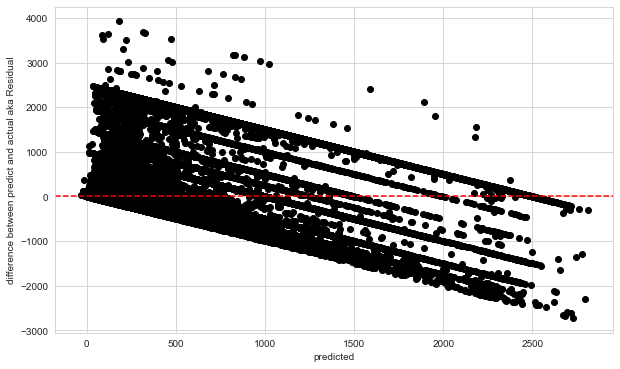

In [565]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly


In [566]:
metrics.r2_score(y_test,y_predict)

0.3028760136200217

In [567]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))  

464.5126472615362

In [568]:
param_grid = {
    'regressor__n_estimators': [100, 200, 500],
    'regressor__max_depth': [10, 20, 30],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__num_leaves': [31, 62, 127]
}


In [571]:
import lightgbm as lgb


In [573]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(random_state=42,n_jobs=-1))
])


In [574]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [575]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.047590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 448324, number of used features: 8
[LightGBM] [Info] Start training from score 288.173721
[CV] END regressor__learning_rate=0.05, regressor__max_depth=10, regressor__n_estimators=200, regressor__num_leaves=31; total time=  17.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.017626 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 448324, number of used features: 8
[LightGBM] [Info] Start training from score 286.543794
[CV] END regressor__learning_rate=0.05, regressor_

[CV] END regressor__learning_rate=0.05, regressor__max_depth=10, regressor__n_estimators=100, regressor__num_leaves=62; total time=  14.1s
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026350 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 878
[LightGBM] [Info] Number of data points in the train set: 448324, number of used features: 8
[LightGBM] [Info] Start training from score 286.543794
[CV] END regressor__learning_rate=0.05, regressor__max_depth=10, regressor__n_estimators=100, regressor__num_leaves=62; total time=  14.4s
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.066163 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 877
[LightGBM] [Info] Number of data points in the train set: 448324, number of used features: 8
[LightGBM] [Info] Start tra

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               TargetEncoder(),
                                                                               ['contbr_city',
                                                                                'contbr_st',
                                                                                'contbr_employer',
                                                                                'contbr_occupation',
                                                                                'Party']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                     

In [576]:
best_model = random_search.best_estimator_

In [577]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

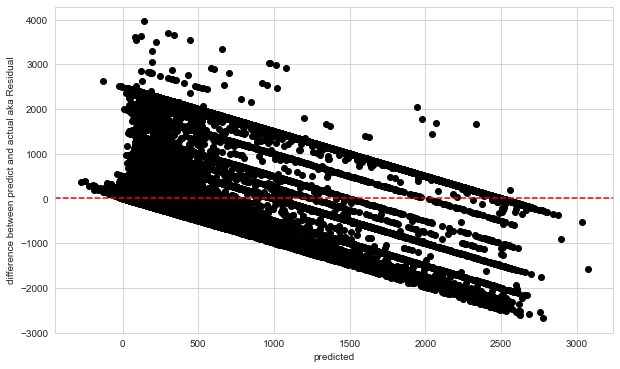

In [578]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly


In [579]:
metrics.r2_score(y_test,y_predict)

0.29324721813201315

In [580]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict)) 

467.70960985577256

In [581]:
param_grid = {
    'regressor__iterations': [100, 200, 500],
    'regressor__depth': [6, 8, 10],
    'regressor__learning_rate': [0.01, 0.05, 0.1],
    'regressor__l2_leaf_reg': [3, 5, 7]
}


In [583]:
from catboost import CatBoostRegressor


In [585]:
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', CatBoostRegressor(random_seed=42, silent=True,thread_count=-1))
])


In [586]:
random_search = RandomizedSearchCV(model, param_grid, cv=3, random_state=42, verbose=2)


In [587]:
%%time

random_search.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END regressor__depth=8, regressor__iterations=100, regressor__l2_leaf_reg=5, regressor__learning_rate=0.01; total time=  22.5s
[CV] END regressor__depth=8, regressor__iterations=100, regressor__l2_leaf_reg=5, regressor__learning_rate=0.01; total time=  20.5s
[CV] END regressor__depth=8, regressor__iterations=100, regressor__l2_leaf_reg=5, regressor__learning_rate=0.01; total time=  21.2s
[CV] END regressor__depth=6, regressor__iterations=100, regressor__l2_leaf_reg=3, regressor__learning_rate=0.01; total time=  18.4s
[CV] END regressor__depth=6, regressor__iterations=100, regressor__l2_leaf_reg=3, regressor__learning_rate=0.01; total time=  18.8s
[CV] END regressor__depth=6, regressor__iterations=100, regressor__l2_leaf_reg=3, regressor__learning_rate=0.01; total time=  19.1s
[CV] END regressor__depth=6, regressor__iterations=500, regressor__l2_leaf_reg=5, regressor__learning_rate=0.05; total time= 1.0min
[CV] END regres

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               TargetEncoder(),
                                                                               ['contbr_city',
                                                                                'contbr_st',
                                                                                'contbr_employer',
                                                                                'contbr_occupation',
                                                                                'Party']),
                                                                              ('num',
                                                                               StandardScaler(),
                                                                     

In [588]:
best_model = random_search.best_estimator_

In [589]:
y_predict = best_model.predict(X_test)

Text(0, 0.5, 'difference between predict and actual aka Residual')

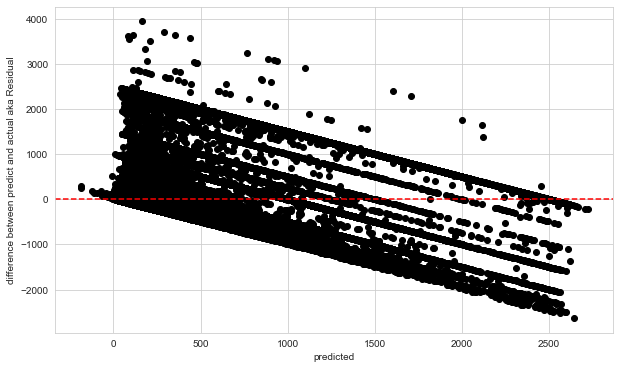

In [590]:
residuals = y_test - y_predict

plt.figure(figsize=(10,6))

plt.scatter(y_predict,residuals,color='black')

plt.axhline(0,color = 'red',linestyle = '--')

plt.xlabel('predicted')

plt.ylabel('difference between predict and actual aka Residual')

#### just not a good model honestly


In [591]:
metrics.r2_score(y_test,y_predict)

0.2769214278093549

In [592]:
np.sqrt(metrics.mean_squared_error(y_test,y_predict))

473.0807491590771

In [ ]:
############################################################################################################################
#### This dataset has proven to be suboptimal for regression models, as our attempts have consistently resulted in an ######
#### R² value no higher than 0.32. Consequently, we have decided to halt further development of this regression model.######
#### Despite the high variance in mean and standard deviation, making it unsuitable for predicting the donation amounts,####
#### we undertook this challenge to push our limits. If anyone has insights or suggestions on improving its performance,####
#### your input would be greatly appreciated. ##############################################################################
############################################################################################################################
